<a href="https://colab.research.google.com/github/314sirius/linked-in/blob/main/Comments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install emoji

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns
import emoji

from wordcloud import WordCloud,STOPWORDS

# Data cleaning

In [ ]:
from google.colab import files

In [ ]:
#if web scraping is done use comments_author.csv
#else upload Comments.csv file here
uploaded=files.upload()

Saving comments_author.csv to comments_author (1).csv


In [ ]:
#if web scraping is done use comments_author.csv
df = pd.read_csv('comments_author.csv', on_bad_lines='skip', encoding = 'utf-8') #or use 'Comments.csv' if sentiment wasn't done
df.head(2)

,Unnamed: 0,Date,Link,Message,Length,emoji_number,Message_no_link,Author,Post
0,0,2025-04-21 17:05:32,https://www.linkedin.com/feed/update/urn%3Ali%...,Won't somebody please think of the sigma males.,47.0,0,Won't somebody please think of the sigma males.,Ralph Aboujaoude Diaz,"Honestly, I always considered myself as a ‚Äúb..."
1,1,2025-04-21 12:09:22,https://www.linkedin.com/feed/update/urn%3Ali%...,"Well, it's not just 'thank you' phrase. Imagin...",292.0,0,"Well, it's not just 'thank you' phrase. Imagin...",Ralph Aboujaoude Diaz,A rare picture of Sam Altman bravely facing th...


In [ ]:
df.shape

(5879, 9)

In [ ]:
# Convert 'Date' column to datetime, dropping rows with invalid dates
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])


In [ ]:
df.shape


(5879, 9)

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df.head(5)

,Unnamed: 0,Date,Link,Message,Length,emoji_number,Message_no_link,Author,Post
0,0,2025-04-21 17:05:32,https://www.linkedin.com/feed/update/urn%3Ali%...,Won't somebody please think of the sigma males.,47.0,0,Won't somebody please think of the sigma males.,Ralph Aboujaoude Diaz,"Honestly, I always considered myself as a ‚Äúb..."
1,1,2025-04-21 12:09:22,https://www.linkedin.com/feed/update/urn%3Ali%...,"Well, it's not just 'thank you' phrase. Imagin...",292.0,0,"Well, it's not just 'thank you' phrase. Imagin...",Ralph Aboujaoude Diaz,A rare picture of Sam Altman bravely facing th...
2,2,2025-04-21 11:46:10,https://www.linkedin.com/feed/update/urn%3Ali%...,Whose body? 🧐,13.0,1,Whose body? 🧐,Michael Kisilenko,The vibe of hype-driven development is killing...
3,3,2025-04-21 09:28:51,https://www.linkedin.com/feed/update/urn%3Ali%...,final prove you are AI.,23.0,0,final prove you are AI.,Ken Cheng,I reprimanded an employee for watching YouTube...
4,4,2025-04-21 07:05:18,https://www.linkedin.com/feed/update/urn%3Ali%...,Does machine have 👀? \n\nEvery move you'll mak...,69.0,2,Does machine have 👀? \n\nEvery move you'll mak...,Marc Duckeck,üóΩ History coming to life\n\nAI is revolutio...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5879 entries, 0 to 5878
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       5879 non-null   int64         
 1   Date             5879 non-null   datetime64[ns]
 2   Link             5879 non-null   object        
 3   Message          5871 non-null   object        
 4   Length           5871 non-null   float64       
 5   emoji_number     5879 non-null   int64         
 6   Message_no_link  5771 non-null   object        
 7   Author           5304 non-null   object        
 8   Post             5304 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 413.5+ KB


# Text preprocessing

In [ ]:
import re

def preprocess_text(text):
    """Preprocesses text for sentiment analysis."""
    if not isinstance(text, str):  # Handle non-string inputs
        return ""

    # Lowercasing
    text = text.lower()

    # Removing URLs
    text = re.sub(r'http\S+', '', text)

    # Removing mentions (@usernames)
    text = re.sub(r'@\w+', '', text)

    # Removing hashtags (#hashtags) -  Decide if you want to keep or remove
    text = re.sub(r'#\w+', '', text)

    # Removing special characters and punctuation (except for spaces)
    text = re.sub(r'[^\w\s]', '', text)

    # Removing extra whitespace
    text = ' '.join(text.split())

    return text


# Apply the preprocessing function to the 'ShareCommentary' column
df['Cleaned_Message'] = df['Message'].apply(preprocess_text)

In [ ]:
df['Cleaned_Post'] = df['Post'].apply(preprocess_text)

In [ ]:
df.head(2)

,Unnamed: 0,Date,Link,Message,Length,emoji_number,Message_no_link,Author,Post,Cleaned_Message,Cleaned_Post
0,0,2025-04-21 17:05:32,https://www.linkedin.com/feed/update/urn%3Ali%...,Won't somebody please think of the sigma males.,47.0,0,Won't somebody please think of the sigma males.,Ralph Aboujaoude Diaz,"Honestly, I always considered myself as a ‚Äúb...",wont somebody please think of the sigma males,honestly i always considered myself as a äúbet...
1,1,2025-04-21 12:09:22,https://www.linkedin.com/feed/update/urn%3Ali%...,"Well, it's not just 'thank you' phrase. Imagin...",292.0,0,"Well, it's not just 'thank you' phrase. Imagin...",Ralph Aboujaoude Diaz,A rare picture of Sam Altman bravely facing th...,well its not just thank you phrase imagine bei...,a rare picture of sam altman bravely facing th...


In [ ]:
# calculate the length of cleaned_message
df['Length'] = df['Cleaned_Message'].str.len().fillna(0).astype(int)


In [ ]:
df.head(2)

,Unnamed: 0,Date,Link,Message,Length,emoji_number,Message_no_link,Author,Post,Cleaned_Message,Cleaned_Post
0,0,2025-04-21 17:05:32,https://www.linkedin.com/feed/update/urn%3Ali%...,Won't somebody please think of the sigma males.,45,0,Won't somebody please think of the sigma males.,Ralph Aboujaoude Diaz,"Honestly, I always considered myself as a ‚Äúb...",wont somebody please think of the sigma males,honestly i always considered myself as a äúbet...
1,1,2025-04-21 12:09:22,https://www.linkedin.com/feed/update/urn%3Ali%...,"Well, it's not just 'thank you' phrase. Imagin...",275,0,"Well, it's not just 'thank you' phrase. Imagin...",Ralph Aboujaoude Diaz,A rare picture of Sam Altman bravely facing th...,well its not just thank you phrase imagine bei...,a rare picture of sam altman bravely facing th...


# Plots

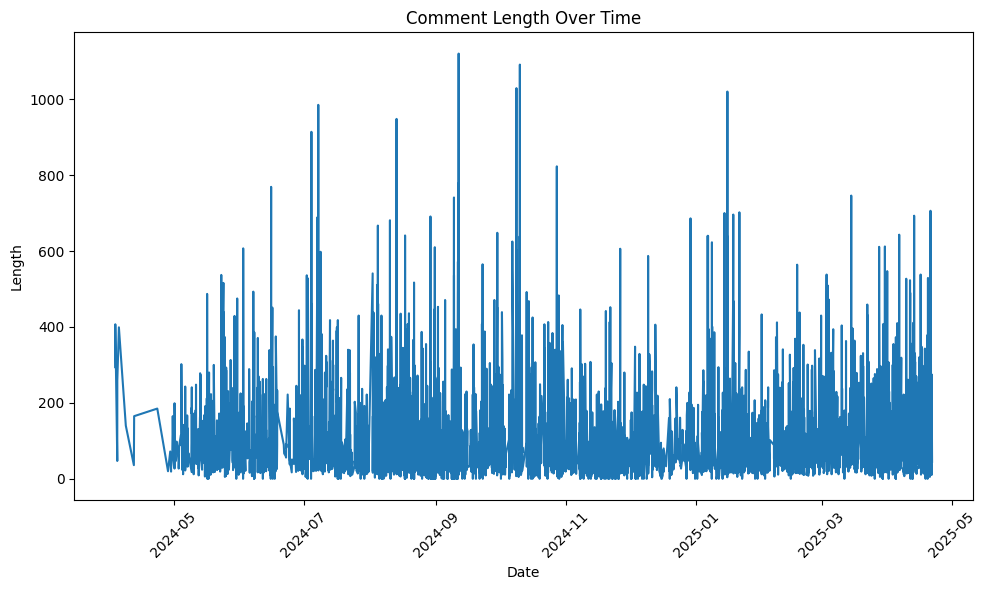

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(df['Date'], df['Length'])
plt.xlabel('Date')
plt.ylabel('Length')
plt.title('Comment Length Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


In [ ]:
# calculates daily comment lengths
daily_message_length = df.groupby(pd.Grouper(key='Date', freq='d'))['Length'].sum()

# Print the result
daily_message_length


,Length
Date,
2024-04-03,701
2024-04-04,306
2024-04-05,399
2024-04-06,0
2024-04-07,0
...,...
2025-04-17,2047
2025-04-18,3650
2025-04-19,3043


# daily message's length


In [ ]:
# Check for missing dates in daily_message_length
date_range = pd.date_range(start=daily_message_length.index.min(), end=daily_message_length.index.max(), freq='D')
missing_dates = date_range.difference(daily_message_length.index)

if missing_dates.empty:
    print("No missing dates found in daily_message_length.")
else:
    print("Missing dates indaily_message_length:")
missing_dates


No missing dates found in daily_message_length.


DatetimeIndex([], dtype='datetime64[ns]', freq='D')

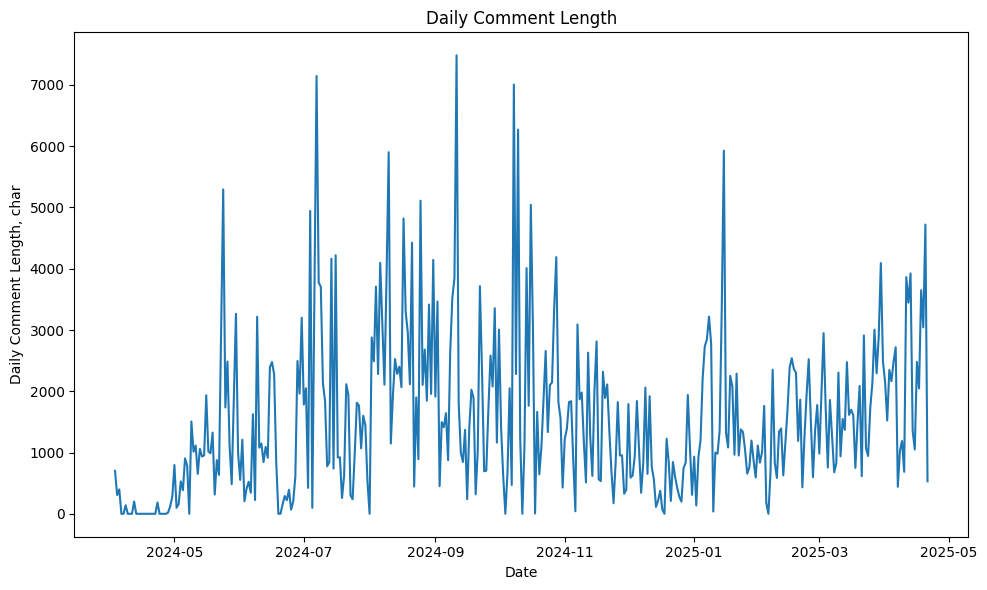

In [ ]:
#plot daily comment lengths
plt.figure(figsize=(10, 6))
plt.plot(daily_message_length.index, daily_message_length.values)
plt.xlabel('Date')
plt.ylabel('Daily Comment Length, char')
plt.title('Daily Comment Length')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
#calculate daily comment count
daily_message_count = df.groupby(pd.Grouper(key='Date', freq='d'))['Message'].count()

# Print the result
daily_message_count

,Message
Date,
2024-04-03,2
2024-04-04,2
2024-04-05,1
2024-04-06,0
2024-04-07,0
...,...
2025-04-17,26
2025-04-18,37
2025-04-19,23


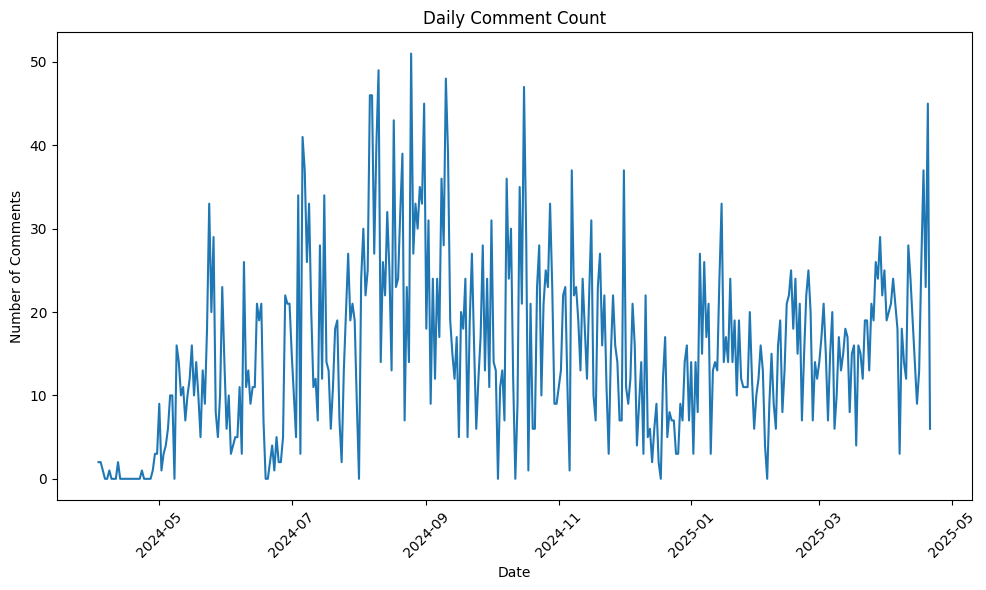

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(daily_message_count.index, daily_message_count.values)
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.title('Daily Comment Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Emoji count

In [ ]:
# count emoji in comments

def count_emoji(text):
  #text=str(text)
  emoji_count = 0
  for char in text:
    if emoji.is_emoji(char):
      emoji_count += 1
  return emoji_count


df['Message'] = df['Message'].astype(str)

df['emoji_number'] = df['Message'].apply(count_emoji)


In [ ]:
count_emoji(df['Message'][2])

1

In [ ]:
df.head(5)

,Unnamed: 0,Date,Link,Message,Length,emoji_number,Message_no_link,Author,Post,Cleaned_Message,Cleaned_Post
0,0,2025-04-21 17:05:32,https://www.linkedin.com/feed/update/urn%3Ali%...,Won't somebody please think of the sigma males.,45,0,Won't somebody please think of the sigma males.,Ralph Aboujaoude Diaz,"Honestly, I always considered myself as a ‚Äúb...",wont somebody please think of the sigma males,honestly i always considered myself as a äúbet...
1,1,2025-04-21 12:09:22,https://www.linkedin.com/feed/update/urn%3Ali%...,"Well, it's not just 'thank you' phrase. Imagin...",275,0,"Well, it's not just 'thank you' phrase. Imagin...",Ralph Aboujaoude Diaz,A rare picture of Sam Altman bravely facing th...,well its not just thank you phrase imagine bei...,a rare picture of sam altman bravely facing th...
2,2,2025-04-21 11:46:10,https://www.linkedin.com/feed/update/urn%3Ali%...,Whose body? 🧐,10,1,Whose body? 🧐,Michael Kisilenko,The vibe of hype-driven development is killing...,whose body,the vibe of hypedriven development is killing ...
3,3,2025-04-21 09:28:51,https://www.linkedin.com/feed/update/urn%3Ali%...,final prove you are AI.,22,0,final prove you are AI.,Ken Cheng,I reprimanded an employee for watching YouTube...,final prove you are ai,i reprimanded an employee for watching youtube...
4,4,2025-04-21 07:05:18,https://www.linkedin.com/feed/update/urn%3Ali%...,Does machine have 👀? \n\nEvery move you'll mak...,59,2,Does machine have 👀? \n\nEvery move you'll mak...,Marc Duckeck,üóΩ History coming to life\n\nAI is revolutio...,does machine have every move youll make ill be...,üóω history coming to life ai is revolutionizi...


In [ ]:
# raw comments without links
import re

def remove_links(text):
  """Removes links from a given text string."""
  return re.sub(r'http\S+', '', text)

# Apply the function to the 'Message' column
df['Message_no_link'] = df['Message'].apply(remove_links)


In [ ]:
df


,Unnamed: 0,Date,Link,Message,Length,emoji_number,Message_no_link,Author,Post,Cleaned_Message,Cleaned_Post
0,0,2025-04-21 17:05:32,https://www.linkedin.com/feed/update/urn%3Ali%...,Won't somebody please think of the sigma males.,45,0,Won't somebody please think of the sigma males.,Ralph Aboujaoude Diaz,"Honestly, I always considered myself as a ‚Äúb...",wont somebody please think of the sigma males,honestly i always considered myself as a äúbet...
1,1,2025-04-21 12:09:22,https://www.linkedin.com/feed/update/urn%3Ali%...,"Well, it's not just 'thank you' phrase. Imagin...",275,0,"Well, it's not just 'thank you' phrase. Imagin...",Ralph Aboujaoude Diaz,A rare picture of Sam Altman bravely facing th...,well its not just thank you phrase imagine bei...,a rare picture of sam altman bravely facing th...
2,2,2025-04-21 11:46:10,https://www.linkedin.com/feed/update/urn%3Ali%...,Whose body? 🧐,10,1,Whose body? 🧐,Michael Kisilenko,The vibe of hype-driven development is killing...,whose body,the vibe of hypedriven development is killing ...
3,3,2025-04-21 09:28:51,https://www.linkedin.com/feed/update/urn%3Ali%...,final prove you are AI.,22,0,final prove you are AI.,Ken Cheng,I reprimanded an employee for watching YouTube...,final prove you are ai,i reprimanded an employee for watching youtube...
4,4,2025-04-21 07:05:18,https://www.linkedin.com/feed/update/urn%3Ali%...,Does machine have 👀? \n\nEvery move you'll mak...,59,2,Does machine have 👀? \n\nEvery move you'll mak...,Marc Duckeck,üóΩ History coming to life\n\nAI is revolutio...,does machine have every move youll make ill be...,üóω history coming to life ai is revolutionizi...
...,...,...,...,...,...,...,...,...,...,...,...
5874,5874,2024-04-05 05:36:50,https://www.linkedin.com/feed/update/urn%3Ali%...,"George, проблема ведь в том, что у психопата, ...",399,0,"George, проблема ведь в том, что у психопата, ...",Mike Torchinsky,–ü—Ä–µ–¥–≤–∑—è—Ç–æ—Å—Ç—å ‚Äì –±–∏—á —Å–æ–≤—Ä–µ...,george проблема ведь в том что у психопата кот...,üäµèçæåçå äì á åæäµºµωωãö ªµäæ úæµç ç åµ ãªæ ω...
5875,5875,2024-04-04 11:50:47,https://www.linkedin.com/feed/update/urn%3Ali%...,"психопаты - идеальные хищники, использующие ми...",259,0,"психопаты - идеальные хищники, использующие ми...",Mike Torchinsky,–ü—Ä–µ–¥–≤–∑—è—Ç–æ—Å—Ç—å ‚Äì –±–∏—á —Å–æ–≤—Ä–µ...,психопаты идеальные хищники использующие мимик...,üäµèçæåçå äì á åæäµºµωωãö ªµäæ úæµç ç åµ ãªæ ω...
5876,5876,2024-04-04 11:18:56,https://www.linkedin.com/feed/update/urn%3Ali%...,И обычно чем длиннее список тем меньше зарплата,47,0,И обычно чем длиннее список тем меньше зарплата,Mike Torchinsky,–ü—Ä–µ–¥–≤–∑—è—Ç–æ—Å—Ç—å ‚Äì –±–∏—á —Å–æ–≤—Ä–µ...,и обычно чем длиннее список тем меньше зарплата,üäµèçæåçå äì á åæäµºµωωãö ªµäæ úæµç ç åµ ãªæ ω...
5877,5877,2024-04-03 13:15:02,https://www.linkedin.com/feed/update/urn%3Ali%...,"Добавлю ещё, что эволюция не поощряет объектив...",407,0,"Добавлю ещё, что эволюция не поощряет объектив...",Mike Torchinsky,–ü—Ä–µ–¥–≤–∑—è—Ç–æ—Å—Ç—å ‚Äì –±–∏—á —Å–æ–≤—Ä–µ...,добавлю ещё что эволюция не поощряет объективн...,üäµèçæåçå äì á åæäµºµωωãö ªµäæ úæµç ç åµ ãªæ ω...


# Web scrapping: Done

## Do only once and save the csv file as comments_authors.csv

In [ ]:
df

,Unnamed: 0,Date,Link,Message,Length,emoji_number,Message_no_link,Author,Post,Cleaned_Message,Cleaned_Post
0,0,2025-04-21 17:05:32,https://www.linkedin.com/feed/update/urn%3Ali%...,Won't somebody please think of the sigma males.,45,0,Won't somebody please think of the sigma males.,Ralph Aboujaoude Diaz,"Honestly, I always considered myself as a ‚Äúb...",wont somebody please think of the sigma males,honestly i always considered myself as a äúbet...
1,1,2025-04-21 12:09:22,https://www.linkedin.com/feed/update/urn%3Ali%...,"Well, it's not just 'thank you' phrase. Imagin...",275,0,"Well, it's not just 'thank you' phrase. Imagin...",Ralph Aboujaoude Diaz,A rare picture of Sam Altman bravely facing th...,well its not just thank you phrase imagine bei...,a rare picture of sam altman bravely facing th...
2,2,2025-04-21 11:46:10,https://www.linkedin.com/feed/update/urn%3Ali%...,Whose body? 🧐,10,1,Whose body? 🧐,Michael Kisilenko,The vibe of hype-driven development is killing...,whose body,the vibe of hypedriven development is killing ...
3,3,2025-04-21 09:28:51,https://www.linkedin.com/feed/update/urn%3Ali%...,final prove you are AI.,22,0,final prove you are AI.,Ken Cheng,I reprimanded an employee for watching YouTube...,final prove you are ai,i reprimanded an employee for watching youtube...
4,4,2025-04-21 07:05:18,https://www.linkedin.com/feed/update/urn%3Ali%...,Does machine have 👀? \n\nEvery move you'll mak...,59,2,Does machine have 👀? \n\nEvery move you'll mak...,Marc Duckeck,üóΩ History coming to life\n\nAI is revolutio...,does machine have every move youll make ill be...,üóω history coming to life ai is revolutionizi...
...,...,...,...,...,...,...,...,...,...,...,...
5874,5874,2024-04-05 05:36:50,https://www.linkedin.com/feed/update/urn%3Ali%...,"George, проблема ведь в том, что у психопата, ...",399,0,"George, проблема ведь в том, что у психопата, ...",Mike Torchinsky,–ü—Ä–µ–¥–≤–∑—è—Ç–æ—Å—Ç—å ‚Äì –±–∏—á —Å–æ–≤—Ä–µ...,george проблема ведь в том что у психопата кот...,üäµèçæåçå äì á åæäµºµωωãö ªµäæ úæµç ç åµ ãªæ ω...
5875,5875,2024-04-04 11:50:47,https://www.linkedin.com/feed/update/urn%3Ali%...,"психопаты - идеальные хищники, использующие ми...",259,0,"психопаты - идеальные хищники, использующие ми...",Mike Torchinsky,–ü—Ä–µ–¥–≤–∑—è—Ç–æ—Å—Ç—å ‚Äì –±–∏—á —Å–æ–≤—Ä–µ...,психопаты идеальные хищники использующие мимик...,üäµèçæåçå äì á åæäµºµωωãö ªµäæ úæµç ç åµ ãªæ ω...
5876,5876,2024-04-04 11:18:56,https://www.linkedin.com/feed/update/urn%3Ali%...,И обычно чем длиннее список тем меньше зарплата,47,0,И обычно чем длиннее список тем меньше зарплата,Mike Torchinsky,–ü—Ä–µ–¥–≤–∑—è—Ç–æ—Å—Ç—å ‚Äì –±–∏—á —Å–æ–≤—Ä–µ...,и обычно чем длиннее список тем меньше зарплата,üäµèçæåçå äì á åæäµºµωωãö ªµäæ úæµç ç åµ ãªæ ω...
5877,5877,2024-04-03 13:15:02,https://www.linkedin.com/feed/update/urn%3Ali%...,"Добавлю ещё, что эволюция не поощряет объектив...",407,0,"Добавлю ещё, что эволюция не поощряет объектив...",Mike Torchinsky,–ü—Ä–µ–¥–≤–∑—è—Ç–æ—Å—Ç—å ‚Äì –±–∏—á —Å–æ–≤—Ä–µ...,добавлю ещё что эволюция не поощряет объективн...,üäµèçæåçå äì á åæäµºµωωãö ªµäæ úæµç ç åµ ãªæ ω...


In [ ]:
# Use this to web scrap

import time
import random

import requests
from bs4 import BeautifulSoup

def get_author_and_text(link):
    try:
        # Introduce a random delay between 2 and 5 seconds
        #delay = random.uniform(2, 5)
        #time.sleep(delay)

        response = requests.get(link)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')
        author_element = soup.find('div', class_='text-color-text')
        if author_element:
            author = author_element.text.strip() # Extract author
            text_element = soup.find('div', class_='attributed-text-segment-list__container relative mt-1 mb-1.5 babybear:mt-0 babybear:mb-0.5') # Extract post text
            if text_element:
                text = text_element.get_text(strip=True)
            else:
                text = "Text not found"
            return author, text
        else:
            return "Author not found", "Text not found"
    except Exception as e:
        print(f"Error processing {link}: {e}")
        return np.nan, np.nan # Return NaN for both author and text in case of error

# Example usage (assuming df500 and 'Link' column exist):
# Apply the function with a delay

In [ ]:
#test if it works on first link
get_author_and_text(df['Link'][0])

('Ralph Aboujaoude Diaz',
 'Honestly, I always considered myself as a ‚Äúbeta male‚Äù. At least betas are more stable, better tested, socially functional, and people actually enjoy their company.#technology#software#workplaceFollow me if you are looking for an honest, sarcastic and funny perspective on¬†technology and workplace. Hit the \uf8ffüîî on my profile to get a notification for all my new posts')

In [ ]:
author_text_data = df['Link'].apply(get_author_and_text)

# Split the tuple into two columns
df[['Author', 'Post']] = pd.DataFrame(author_text_data.tolist(), index=df.index)

In [ ]:
df

In [ ]:
df.to_csv('comments_author.csv', encoding = 'utf-8')
files.download('comments_author.csv')

## Analysis of comments length by author

In [ ]:
emoji.demojize('Sven Dolahsek after watchi less convinced they will save us. 😂')

# Sentiment analysis: Done

In [ ]:
!pip install transformers
!pip install tqdm

import pandas as pd
import re
from transformers import pipeline
from tqdm import tqdm

# Assuming df and the 'Message_no_link' column are already defined as in your code

# Load the sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

# Function to analyze sentiment with progress bar
def analyze_sentiment_with_progress(messages):
    sentiments = []
    for message in tqdm(messages, desc="Analyzing sentiment"):
      try:
        sentiments.append(sentiment_pipeline(message)[0])
      except Exception as e:
        print(f"Error analyzing: {message}. Error:{e}")
        sentiments.append({'label':'ERROR', 'score':0})
    return sentiments

# Analyze sentiment with progress bar
#df_filtered['Sentiment'] = analyze_sentiment_with_progress(df['Cleaned_Post'].astype(str))
#df_filtered

sentiment_results = analyze_sentiment_with_progress(df['Cleaned_Message'].astype(str))

df[['Sentiment_Label_message', 'Sentiment_Score_message']] = pd.DataFrame(
    [(result['label'], result['score']) for result in sentiment_results],
    index=df.index
)


In [ ]:
sentiment_results = analyze_sentiment_with_progress(df['Cleaned_Post'].astype(str))

df[['Sentiment_Label_post', 'Sentiment_Score_post']] = pd.DataFrame(
    [(result['label'], result['score']) for result in sentiment_results],
    index=df.index
)

In [ ]:
df

,Unnamed: 0,Date,Link,Message,Length,emoji_number,Message_no_link,Author,Post,Cleaned_Message,Cleaned_Post,Sentiment_Label_message,Sentiment_Score_message,Sentiment_Label_post,Sentiment_Score_post
0,0,2025-04-21 17:05:32,https://www.linkedin.com/feed/update/urn%3Ali%...,Won't somebody please think of the sigma males.,45,0,Won't somebody please think of the sigma males.,Ralph Aboujaoude Diaz,"Honestly, I always considered myself as a ‚Äúb...",wont somebody please think of the sigma males,honestly i always considered myself as a äúbet...,POSITIVE,0.910821,POSITIVE,0.943981
1,1,2025-04-21 12:09:22,https://www.linkedin.com/feed/update/urn%3Ali%...,"Well, it's not just 'thank you' phrase. Imagin...",275,0,"Well, it's not just 'thank you' phrase. Imagin...",Ralph Aboujaoude Diaz,A rare picture of Sam Altman bravely facing th...,well its not just thank you phrase imagine bei...,a rare picture of sam altman bravely facing th...,NEGATIVE,0.957057,POSITIVE,0.903346
2,2,2025-04-21 11:46:10,https://www.linkedin.com/feed/update/urn%3Ali%...,Whose body? 🧐,10,1,Whose body? 🧐,Michael Kisilenko,The vibe of hype-driven development is killing...,whose body,the vibe of hypedriven development is killing ...,POSITIVE,0.957440,NEGATIVE,0.999374
3,3,2025-04-21 09:28:51,https://www.linkedin.com/feed/update/urn%3Ali%...,final prove you are AI.,22,0,final prove you are AI.,Ken Cheng,I reprimanded an employee for watching YouTube...,final prove you are ai,i reprimanded an employee for watching youtube...,POSITIVE,0.634744,NEGATIVE,0.865473
4,4,2025-04-21 07:05:18,https://www.linkedin.com/feed/update/urn%3Ali%...,Does machine have 👀? \n\nEvery move you'll mak...,59,2,Does machine have 👀? \n\nEvery move you'll mak...,Marc Duckeck,üóΩ History coming to life\n\nAI is revolutio...,does machine have every move youll make ill be...,üóω history coming to life ai is revolutionizi...,NEGATIVE,0.979554,POSITIVE,0.988661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5874,5874,2024-04-05 05:36:50,https://www.linkedin.com/feed/update/urn%3Ali%...,"George, проблема ведь в том, что у психопата, ...",399,0,"George, проблема ведь в том, что у психопата, ...",Mike Torchinsky,–ü—Ä–µ–¥–≤–∑—è—Ç–æ—Å—Ç—å ‚Äì –±–∏—á —Å–æ–≤—Ä–µ...,george проблема ведь в том что у психопата кот...,üäµèçæåçå äì á åæäµºµωωãö ªµäæ úæµç ç åµ ãªæ ω...,NEGATIVE,0.800548,ERROR,0.000000
5875,5875,2024-04-04 11:50:47,https://www.linkedin.com/feed/update/urn%3Ali%...,"психопаты - идеальные хищники, использующие ми...",259,0,"психопаты - идеальные хищники, использующие ми...",Mike Torchinsky,–ü—Ä–µ–¥–≤–∑—è—Ç–æ—Å—Ç—å ‚Äì –±–∏—á —Å–æ–≤—Ä–µ...,психопаты идеальные хищники использующие мимик...,üäµèçæåçå äì á åæäµºµωωãö ªµäæ úæµç ç åµ ãªæ ω...,NEGATIVE,0.717749,ERROR,0.000000
5876,5876,2024-04-04 11:18:56,https://www.linkedin.com/feed/update/urn%3Ali%...,И обычно чем длиннее список тем меньше зарплата,47,0,И обычно чем длиннее список тем меньше зарплата,Mike Torchinsky,–ü—Ä–µ–¥–≤–∑—è—Ç–æ—Å—Ç—å ‚Äì –±–∏—á —Å–æ–≤—Ä–µ...,и обычно чем длиннее список тем меньше зарплата,üäµèçæåçå äì á åæäµºµωωãö ªµäæ úæµç ç åµ ãªæ ω...,NEGATIVE,0.715546,ERROR,0.000000
5877,5877,2024-04-03 13:15:02,https://www.linkedin.com/feed/update/urn%3Ali%...,"Добавлю ещё, что эволюция не поощряет объектив...",407,0,"Добавлю ещё, что эволюция не поощряет объектив...",Mike Torchinsky,–ü—Ä–µ–¥–≤–∑—è—Ç–æ—Å—Ç—å ‚Äì –±–∏—á —Å–æ–≤—Ä–µ...,добавлю ещё что эволюция не поощряет объективн...,üäµèçæåçå äì á åæäµºµωωãö ªµäæ úæµç ç åµ ãªæ ω...,NEGATIVE,0.856077,ERROR,0.000000


In [ ]:
# saving sentiment analysis
df.to_csv('comments_author_sentiment.csv', encoding = 'utf-8')
files.download('comments_author_sentiment.csv')

# START HERE AFTER SENTIMENT IS DONE

In [ ]:
#if web scraping and sentiment is done use comments_author_sentiment.csv

uploaded=files.upload()

Saving comments_author_sentiment.csv to comments_author_sentiment (1).csv


In [ ]:
df = pd.read_csv('comments_author_sentiment.csv', on_bad_lines='skip', encoding = 'utf-8')
df.head(2)

,Unnamed: 0.1,Unnamed: 0,Date,Link,Message,Length,emoji_number,Message_no_link,Author,Post,Cleaned_Message,Cleaned_Post,Sentiment_Label_message,Sentiment_Score_message,Sentiment_Label_post,Sentiment_Score_post
0,0,0,2025-04-21 17:05:32,https://www.linkedin.com/feed/update/urn%3Ali%...,Won't somebody please think of the sigma males.,45,0,Won't somebody please think of the sigma males.,Ralph Aboujaoude Diaz,"Honestly, I always considered myself as a ‚Äúb...",wont somebody please think of the sigma males,honestly i always considered myself as a äúbet...,POSITIVE,0.910821,POSITIVE,0.943981
1,1,1,2025-04-21 12:09:22,https://www.linkedin.com/feed/update/urn%3Ali%...,"Well, it's not just 'thank you' phrase. Imagin...",275,0,"Well, it's not just 'thank you' phrase. Imagin...",Ralph Aboujaoude Diaz,A rare picture of Sam Altman bravely facing th...,well its not just thank you phrase imagine bei...,a rare picture of sam altman bravely facing th...,NEGATIVE,0.957057,POSITIVE,0.903346


In [ ]:
df.Cleaned_Message[0]

'wont somebody please think of the sigma males'

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])

## WORD CLOUD AFTER WORD PREPROCESSING

Comment: needed to leave apostrophe in cleaned text, so "i'm" could be recornized by stopwords and removed from word cloud

There are 106383 names.


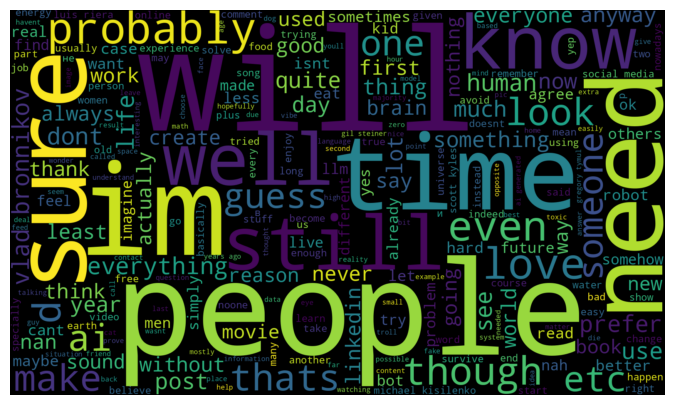

In [ ]:
#create most frequent names cloud

lst=[str(message).split() for message in df.Cleaned_Message]
flat_lst = [item for sublist in lst for item in sublist]

text = " ".join(flat_lst)
print ("There are {} names.".format(len(text.split())))

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, width=1700, height=1000, max_words=250, background_color="black").generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
from collections import Counter

word_counts = Counter(flat_lst)

# Get the top 200 most frequent words
top_200_words = word_counts.most_common(50)

# Print the top 200 words and their counts
for word, count in top_200_words:
    print(f"{word}: {count}")


the: 3178
to: 2924
i: 2230
and: 1834
it: 1668
a: 1563
of: 1550
is: 1482
you: 1306
in: 1256
for: 1102
not: 1037
are: 949
with: 872
be: 861
its: 848
but: 751
or: 680
so: 675
just: 655
will: 619
my: 614
like: 607
this: 576
can: 535
we: 525
im: 509
on: 508
that: 503
they: 494
as: 487
people: 471
me: 456
if: 444
all: 441
was: 423
too: 401
no: 386
at: 362
do: 358
some: 334
your: 334
have: 329
more: 321
an: 320
what: 307
about: 283
ai: 280
from: 280
only: 278


## MESSAGE LENGTH ANALYSIS

In [ ]:
# Group by author, sum the 'Length' column, and sort in descending order
author_length_sum = df.groupby('Author')['Length'].sum().sort_values(ascending=False)

author_length_sum

author_length_summary = df.groupby('Author')['Length'].agg(['sum', 'max', 'min', 'mean', 'median', 'count']).sort_values(by='sum', ascending=False)
author_length_summary.head(20)

,sum,max,min,mean,median,count
Author,,,,,,
Julia G.,40144,746,0,102.147583,71.0,393
Andreas Horn,28209,686,5,143.923469,96.0,196
Vlad Bronnikov,26847,574,0,68.662404,48.0,391
Michael Kisilenko,23734,696,8,130.406593,90.5,182
Marcus Scholle,23193,537,0,88.862069,65.0,261
Ralph Aboujaoude Diaz,19564,914,0,104.620321,67.0,187
Marc Duckeck,16190,538,3,103.121019,77.0,157
Stephen Telford,14610,1020,4,98.716216,51.5,148
Ross Sullivan,11593,302,0,72.006211,61.0,161


## ANALYSIS BY QUARTERS FOR BOX PLOTS

In [ ]:
# Create quartal labels
df['Quartal'] = pd.PeriodIndex(df['Date'], freq='Q').astype(str)

# Define the quartals you want to split by
quartals = ['2024Q1', '2024Q2', '2024Q3', '2024Q4', '2025Q1', '2025Q2']

# Split the DataFrame into a dictionary of DataFrames, one for each quartal
quartal_dfs = {}
for quartal in quartals:
  quartal_dfs[quartal] = df[df['Quartal'] == quartal]




In [ ]:
df

,Unnamed: 0.1,Unnamed: 0,Date,Link,Message,Length,emoji_number,Message_no_link,Author,Post,Cleaned_Message,Cleaned_Post,Sentiment_Label_message,Sentiment_Score_message,Sentiment_Label_post,Sentiment_Score_post,Quartal
0,0,0,2025-04-21 17:05:32,https://www.linkedin.com/feed/update/urn%3Ali%...,Won't somebody please think of the sigma males.,45,0,Won't somebody please think of the sigma males.,Ralph Aboujaoude Diaz,"Honestly, I always considered myself as a ‚Äúb...",wont somebody please think of the sigma males,honestly i always considered myself as a äúbet...,POSITIVE,0.910821,POSITIVE,0.943981,2025Q2
1,1,1,2025-04-21 12:09:22,https://www.linkedin.com/feed/update/urn%3Ali%...,"Well, it's not just 'thank you' phrase. Imagin...",275,0,"Well, it's not just 'thank you' phrase. Imagin...",Ralph Aboujaoude Diaz,A rare picture of Sam Altman bravely facing th...,well its not just thank you phrase imagine bei...,a rare picture of sam altman bravely facing th...,NEGATIVE,0.957057,POSITIVE,0.903346,2025Q2
2,2,2,2025-04-21 11:46:10,https://www.linkedin.com/feed/update/urn%3Ali%...,Whose body? 🧐,10,1,Whose body? 🧐,Michael Kisilenko,The vibe of hype-driven development is killing...,whose body,the vibe of hypedriven development is killing ...,POSITIVE,0.957440,NEGATIVE,0.999374,2025Q2
3,3,3,2025-04-21 09:28:51,https://www.linkedin.com/feed/update/urn%3Ali%...,final prove you are AI.,22,0,final prove you are AI.,Ken Cheng,I reprimanded an employee for watching YouTube...,final prove you are ai,i reprimanded an employee for watching youtube...,POSITIVE,0.634744,NEGATIVE,0.865473,2025Q2
4,4,4,2025-04-21 07:05:18,https://www.linkedin.com/feed/update/urn%3Ali%...,Does machine have 👀? \n\nEvery move you'll mak...,59,2,Does machine have 👀? \n\nEvery move you'll mak...,Marc Duckeck,üóΩ History coming to life\n\nAI is revolutio...,does machine have every move youll make ill be...,üóω history coming to life ai is revolutionizi...,NEGATIVE,0.979554,POSITIVE,0.988661,2025Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5874,5874,5874,2024-04-05 05:36:50,https://www.linkedin.com/feed/update/urn%3Ali%...,"George, проблема ведь в том, что у психопата, ...",399,0,"George, проблема ведь в том, что у психопата, ...",Mike Torchinsky,–ü—Ä–µ–¥–≤–∑—è—Ç–æ—Å—Ç—å ‚Äì –±–∏—á —Å–æ–≤—Ä–µ...,george проблема ведь в том что у психопата кот...,üäµèçæåçå äì á åæäµºµωωãö ªµäæ úæµç ç åµ ãªæ ω...,NEGATIVE,0.800548,ERROR,0.000000,2024Q2
5875,5875,5875,2024-04-04 11:50:47,https://www.linkedin.com/feed/update/urn%3Ali%...,"психопаты - идеальные хищники, использующие ми...",259,0,"психопаты - идеальные хищники, использующие ми...",Mike Torchinsky,–ü—Ä–µ–¥–≤–∑—è—Ç–æ—Å—Ç—å ‚Äì –±–∏—á —Å–æ–≤—Ä–µ...,психопаты идеальные хищники использующие мимик...,üäµèçæåçå äì á åæäµºµωωãö ªµäæ úæµç ç åµ ãªæ ω...,NEGATIVE,0.717749,ERROR,0.000000,2024Q2
5876,5876,5876,2024-04-04 11:18:56,https://www.linkedin.com/feed/update/urn%3Ali%...,И обычно чем длиннее список тем меньше зарплата,47,0,И обычно чем длиннее список тем меньше зарплата,Mike Torchinsky,–ü—Ä–µ–¥–≤–∑—è—Ç–æ—Å—Ç—å ‚Äì –±–∏—á —Å–æ–≤—Ä–µ...,и обычно чем длиннее список тем меньше зарплата,üäµèçæåçå äì á åæäµºµωωãö ªµäæ úæµç ç åµ ãªæ ω...,NEGATIVE,0.715546,ERROR,0.000000,2024Q2
5877,5877,5877,2024-04-03 13:15:02,https://www.linkedin.com/feed/update/urn%3Ali%...,"Добавлю ещё, что эволюция не поощряет объектив...",407,0,"Добавлю ещё, что эволюция не поощряет объектив...",Mike Torchinsky,–ü—Ä–µ–¥–≤–∑—è—Ç–æ—Å—Ç—å ‚Äì –±–∏—á —Å–æ–≤—Ä–µ...,добавлю ещё что эволюция не поощряет объективн...,üäµèçæåçå äì á åæäµºµωωãö ªµäæ úæµç ç åµ ãªæ ω...,NEGATIVE,0.856077,ERROR,0.000000,2024Q2


## BOX PLOTS OF 15 TOP AUTHORS

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 63743 (\uf8ff) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


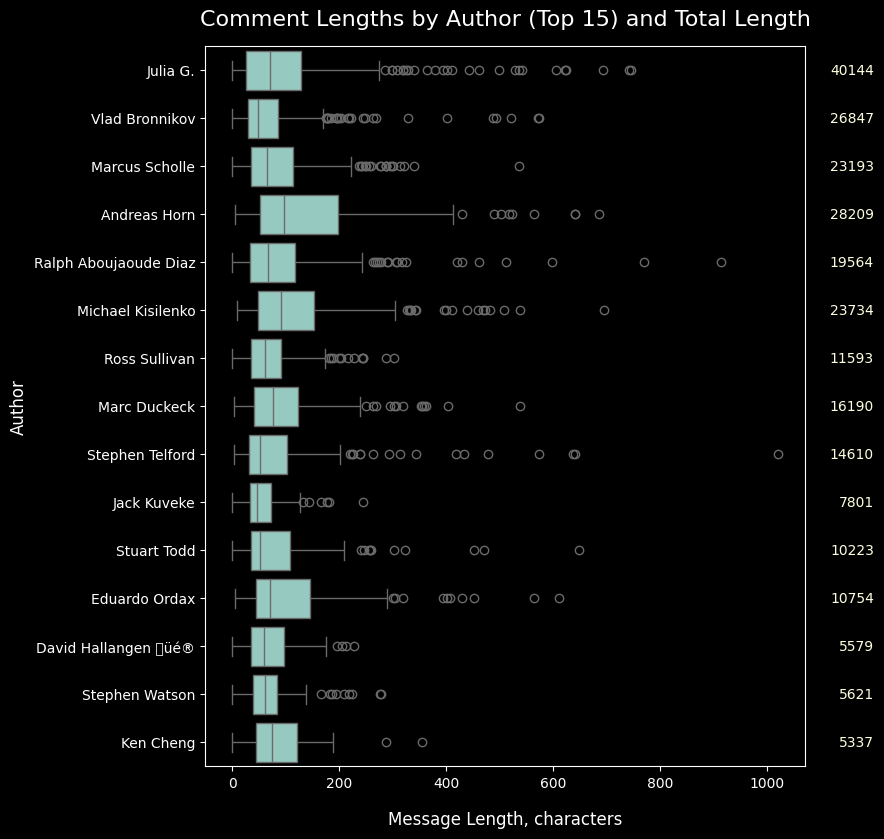

In [ ]:
import matplotlib.pyplot as plt

# Create the boxplot
plt.figure(figsize=(10, 12))  # Adjust figure size as needed
sns.boxplot(x='Length', y='Author', data=df[df['Author'].isin(top_15_authors.index)], order=top_15_authors.index)
plt.xlabel('Message Length, characters', fontsize=12, labelpad=15)
plt.ylabel('Author', fontsize=12)
plt.title(f'Comment Lengths by Author (Top {n}) and Total Length', fontsize=16,  pad=15) # pad adds space betwen title and plot

# Add total length annotations to the right of each boxplot
for author in top_15_authors.index:
    total_length = author_length_sum[author]
    plt.text(1200,  # Adjust x-position
             top_15_authors.index.get_loc(author),  # y-position
             f'{total_length:.0f}',
             ha='right',  # Horizontal alignment
             va='center',  # Vertical alignment
             fontsize=10,  # Adjust font size if needed
             color='lightyellow'  # Adjust color if needed
             )

plt.style.use('dark_background')
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2) # Adjust these values as needed

plt.show()


In [ ]:
top_15_authors.values[-1]

np.int64(61)

## 6 BOX PLOTS BY QUARTERS

<ipython-input-15-8149985130e9>:27: UserWarning: Glyph 63743 (\uf8ff) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 63743 (\uf8ff) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


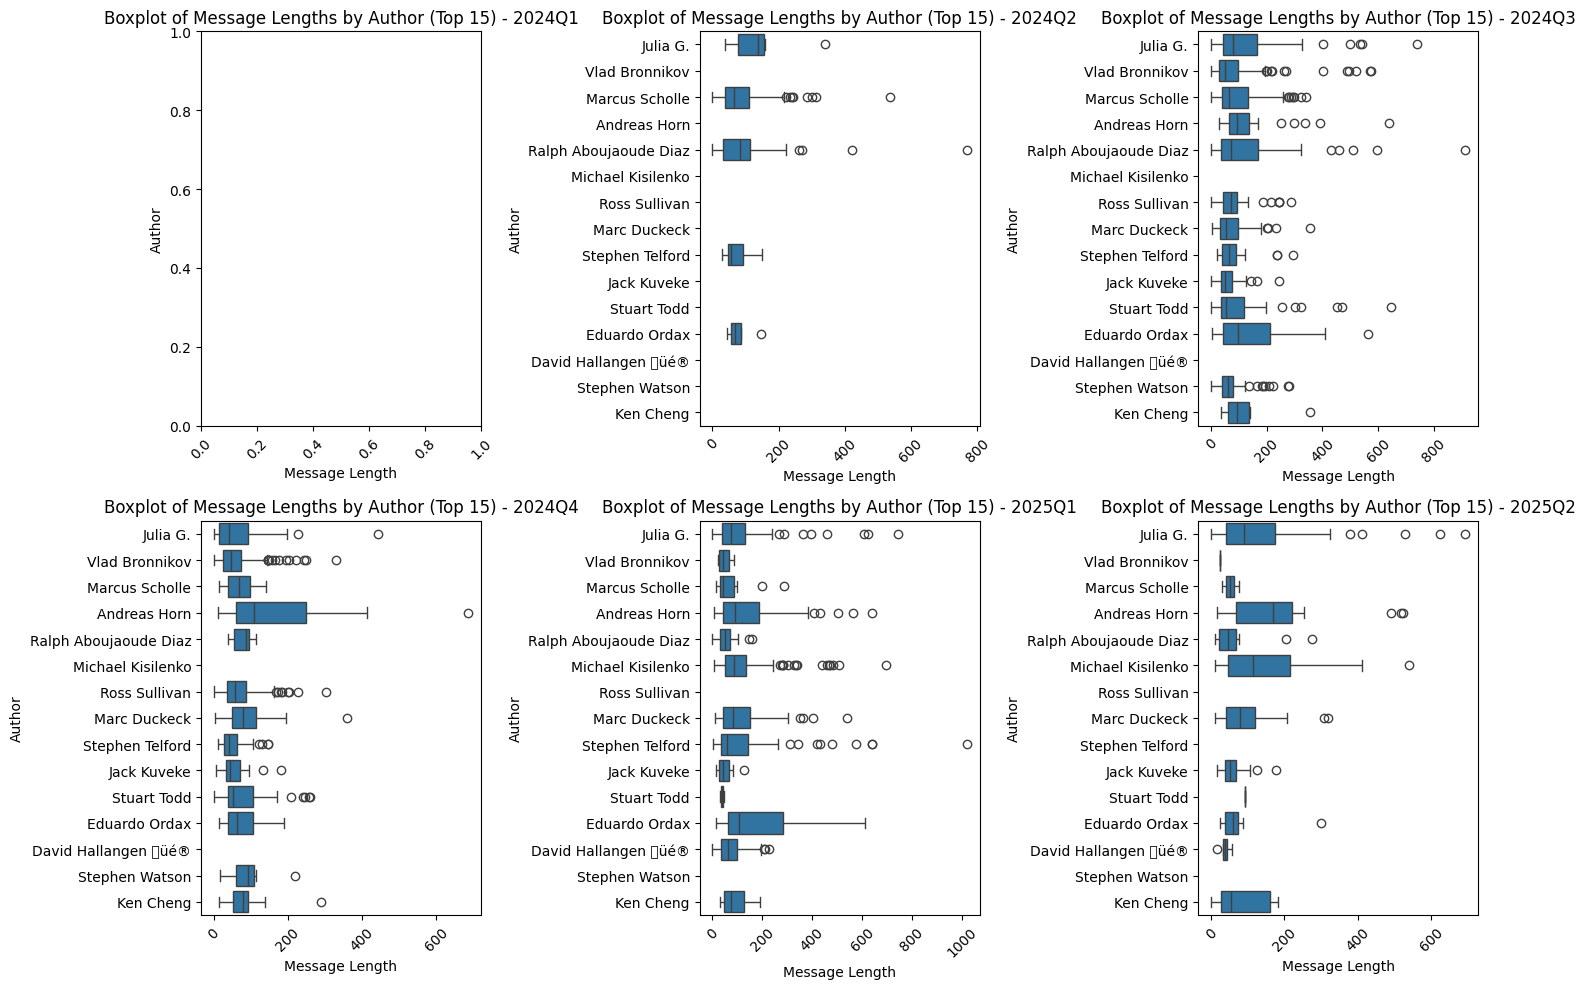

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the top 215 authors by the sum of their message lengths

# Define the quartals you want to plot
quartals = ['2024Q1', '2024Q2', '2024Q3', '2024Q4', '2025Q1', '2025Q2']

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns
axes = axes.flatten()  # Flatten the axes array for easier iteration

for i, quartal in enumerate(quartals):
    # Filter data for the current quartal and the top 20 authors
    data_quartal = df[(df['Quartal'] == quartal) & (df['Author'].isin(top_15_authors.index))]

    # Create boxplot on the current subplot
    sns.boxplot(x='Length', y='Author', data=data_quartal, order=top_15_authors.index, ax=axes[i])
    axes[i].set_xlabel('Message Length')
    axes[i].set_ylabel('Author')
    axes[i].set_title(f'Boxplot of Message Lengths by Author (Top 15) - {quartal}')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


## 2 BOXPLOTS BY YEAR

<ipython-input-16-ca0e691dbd2d>:29: UserWarning: Glyph 63743 (\uf8ff) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 63743 (\uf8ff) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


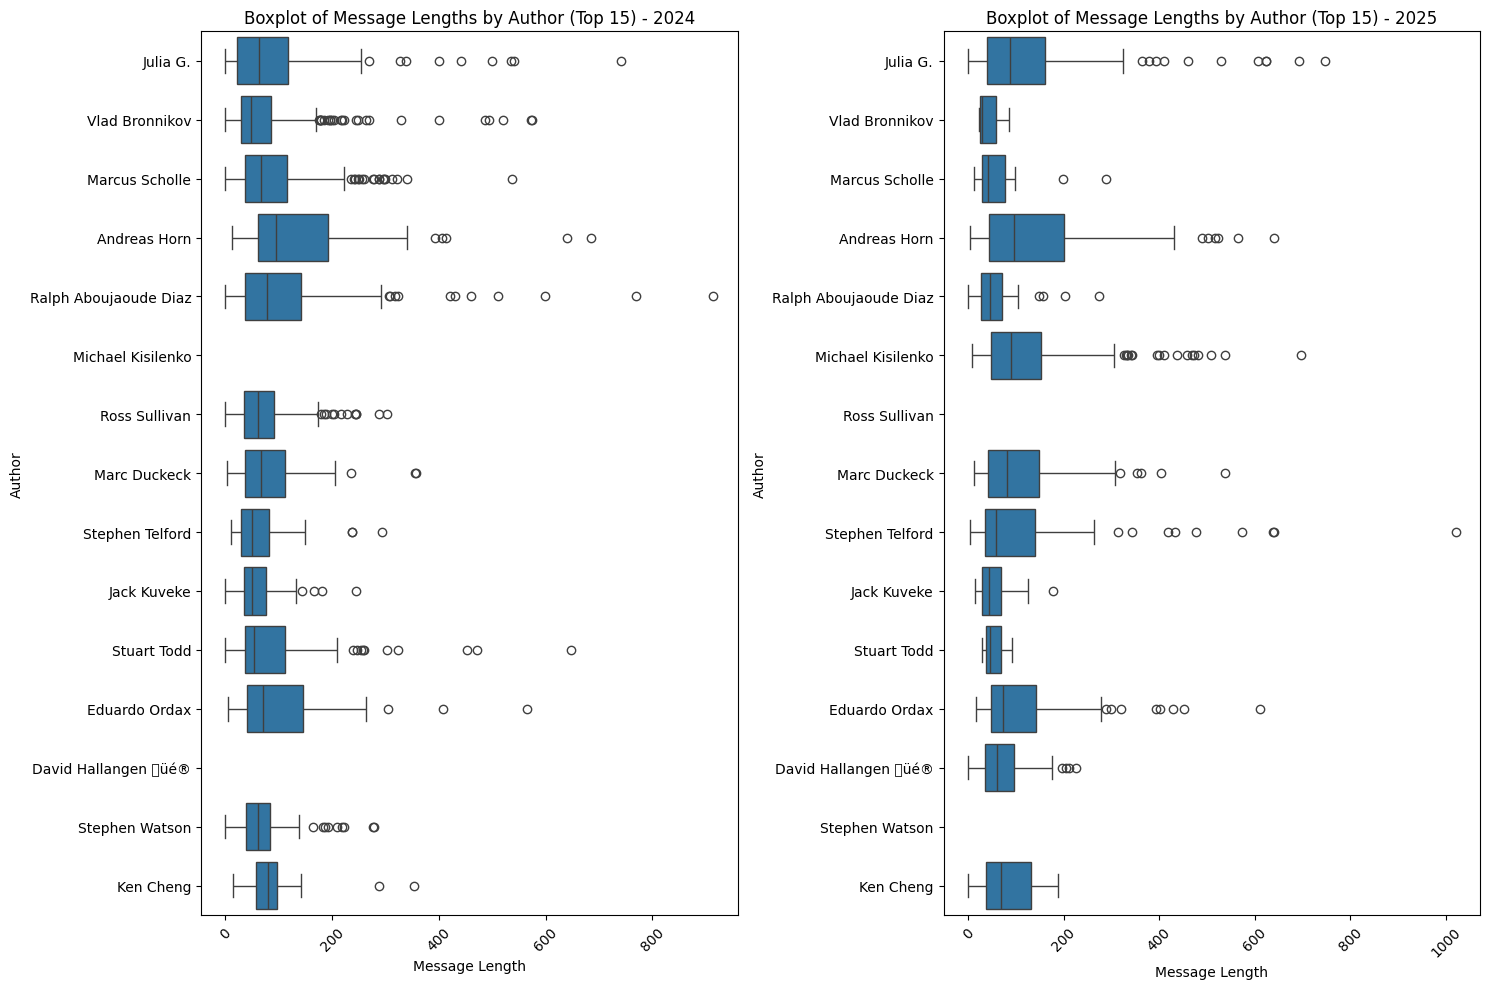

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the top 15 authors by the sum of their message lengths

# Define the year you want to plot
years = [2024, 2025]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 10))  # 2 rows, 3 columns
axes = axes.flatten()  # Flatten the axes array for easier iteration

for i, year in enumerate(years):
    # Filter data for the current quartal and the top 15 authors
    data_year= df[(df['Date'].dt.year == year) & (df['Author'].isin(top_15_authors.index))]

    # Create boxplot on the current subplot
    sns.boxplot(x='Length', y='Author', data=data_year, order=top_15_authors.index, ax=axes[i])
    axes[i].set_xlabel('Message Length')
    axes[i].set_ylabel('Author')
    axes[i].set_title(f'Boxplot of Message Lengths by Author (Top 15) - {year}')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

plt.style.use('dark_background')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

## BOX PLOTS BY AUTHORS

<ipython-input-17-7d4aa25fee6c>:20: UserWarning: Glyph 63743 (\uf8ff) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 63743 (\uf8ff) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


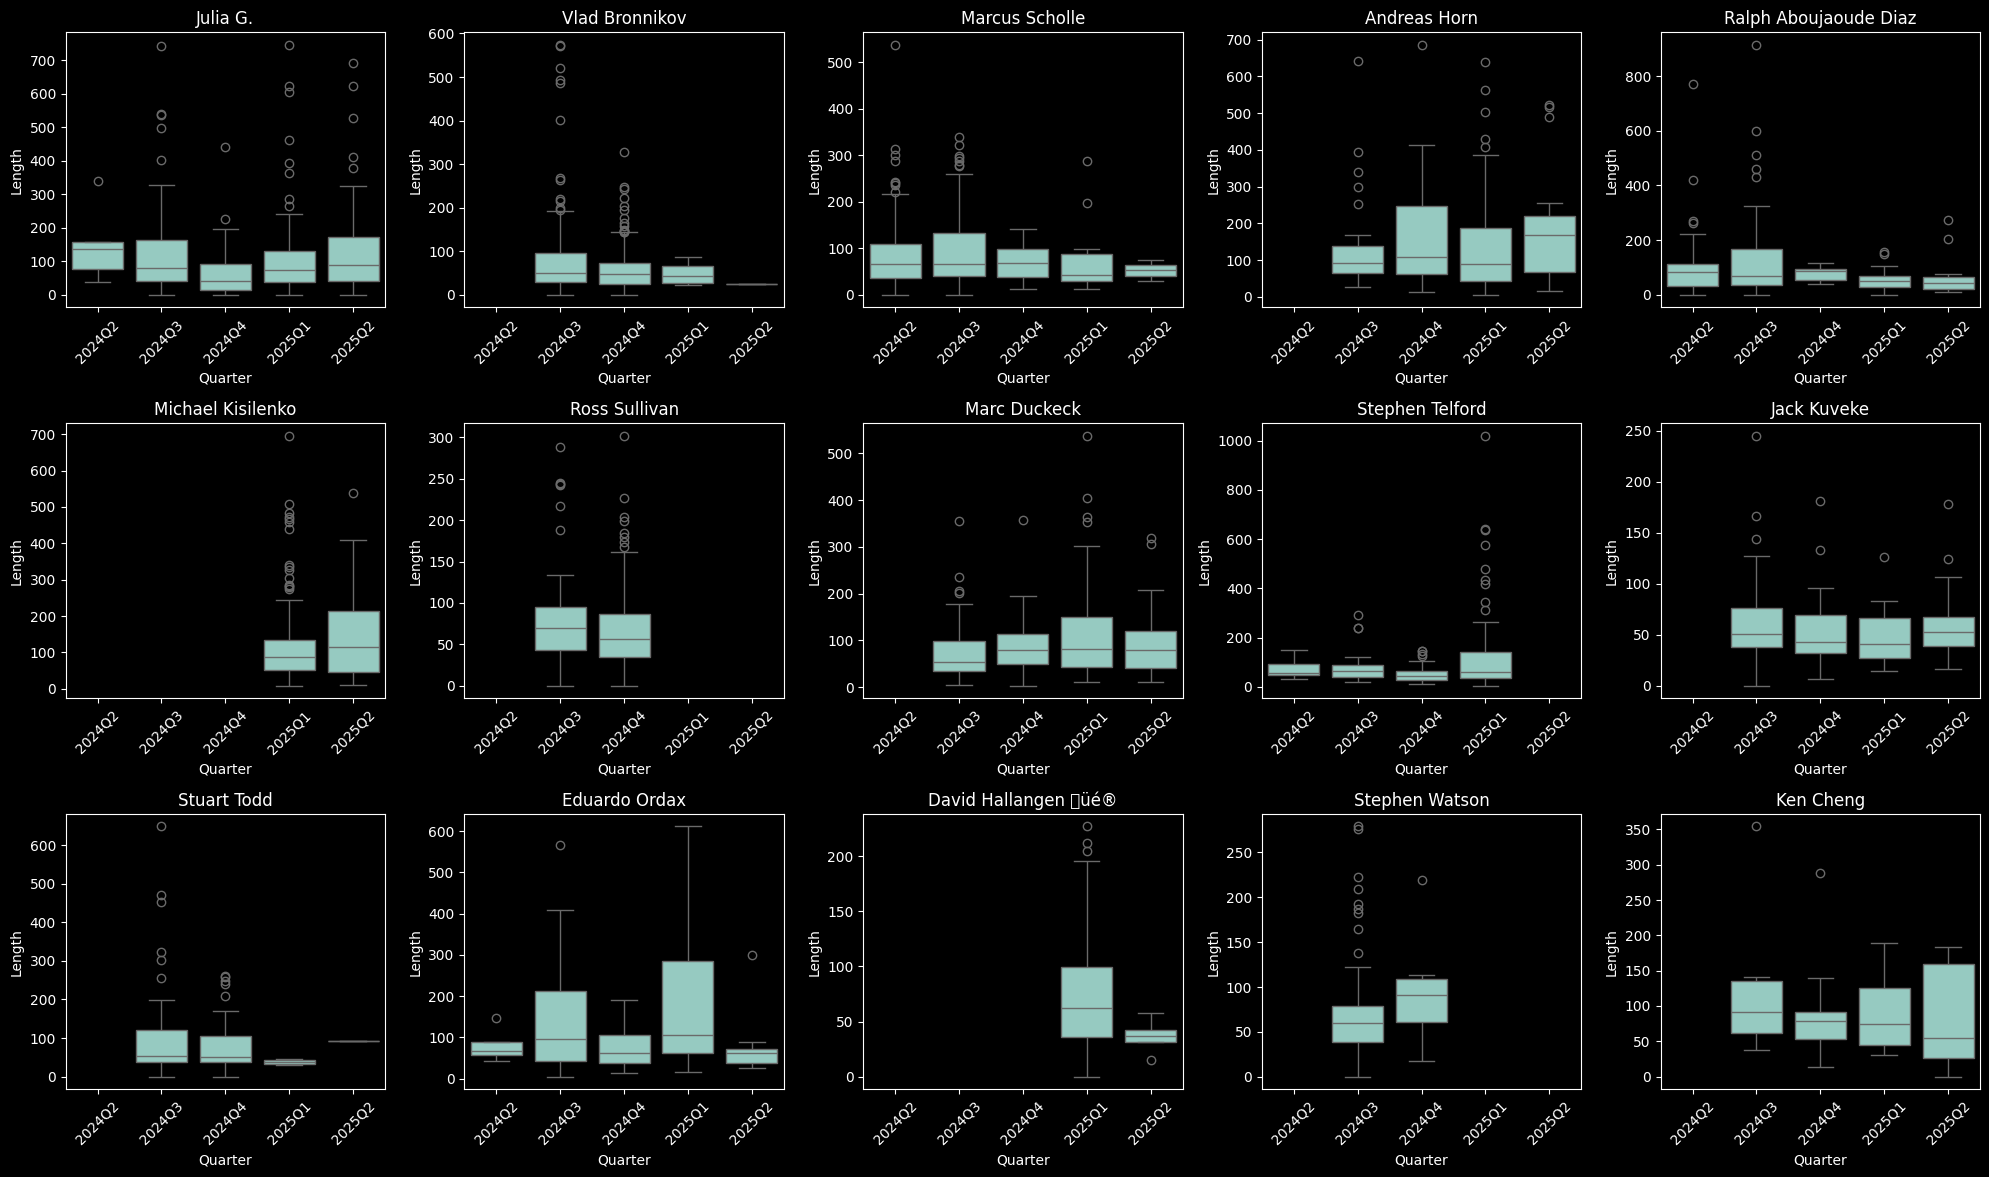

In [ ]:
# Convert 'Date' column to datetime objects if not already done
df['Date'] = pd.to_datetime(df['Date'])

# Create time period categories (e.g., quarters)
df['Quarter'] = df['Date'].dt.to_period('Q')

# Create the box plots
plt.figure(figsize=(20, 15))  # Adjust figure size as needed

for i, author in enumerate(top_15_authors.index):
    plt.subplot(4, 5, i + 1)  # Create subplots in a 4x5 grid
    author_data = df[df['Author'] == author]
    sns.boxplot(x='Quarter', y='Length', data=author_data, order=df['Quarter'][::-1])
    plt.title(author)
    plt.xticks(rotation=45) # Rotate x-axis labels for better readability
    plt.tight_layout()

plt.style.use('dark_background')

plt.show()


## PIVOT TABLE MONTHLY TOTAL MESSAGE LENGTHS BY AUTHORS

In [ ]:

pivot_table = df.pivot_table(index=pd.Grouper(key='Date', freq='ME'),
                                     columns='Author',
                                     values='Length',
                                     aggfunc='sum',
                                     fill_value=0)

pivot_table.index = pd.to_datetime(pivot_table.index, format='%ME-%Y')

pivot_table

Author,.Alex Dunsdon,A-A-Ron McCoy üßôüèª‚ôÇÔ∏è,AI,AI Echo,AI Memes,Aaron Prather,Abhishek Thakur,Adam Jacobi MBA üá´üá∑üá©üá™üá®üá≠,Adam Karpiak,Adelle Fieldsend,...,ü¶î james hawkins,üåª Anna Miller,üåè Tr√© R.,üëª Joe Goulcher,üí°Nuno Reis,üî• Danny Shaket,üõ°Ô∏è David E.,üöó Karol üöÄ‚ö°Ô∏è,ü•É Greg Stellflue ü•É,𝙈𝙞𝙣𝙙 𝘽𝙚𝙣𝙙𝙞𝙣𝙜 𝙋𝙝𝙮𝙨𝙞𝙘𝙨
Date,,,,,,,,,,,,,,,,,,,,,
2024-04-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2024-05-31,0,0,0,105,0,0,75,0,23,0,...,5,0,66,0,0,0,0,13,0,0
2024-06-30,0,0,0,179,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2024-07-31,0,0,0,16,0,114,0,0,0,0,...,0,0,0,0,0,0,105,0,0,0
2024-08-31,0,0,49,0,0,0,0,0,0,0,...,0,0,0,0,910,0,0,0,0,0
2024-09-30,0,0,0,0,0,0,0,37,0,0,...,0,69,0,0,0,0,0,0,0,0
2024-10-31,65,0,0,0,0,0,0,922,0,0,...,0,0,0,0,0,336,0,0,0,0
2024-11-30,0,0,0,0,0,0,0,54,0,0,...,0,0,0,0,0,0,0,0,0,0
2024-12-31,0,254,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
top_15_authors

,Message
Author,
Julia G.,393
Vlad Bronnikov,391
Marcus Scholle,260
Andreas Horn,196
Ralph Aboujaoude Diaz,186
Michael Kisilenko,182
Ross Sullivan,161
Marc Duckeck,157
Stephen Telford,148


## PIVOT TABLE WITH THE TOP 15 AUTHORS ONLY FOR THE HEATMAP

In [ ]:
pivot_table = df[df['Author'].isin(top_15_authors.index)].pivot_table(index=pd.Grouper(key='Date', freq='ME'),
                                     columns='Author',
                                     values='Length',
                                     aggfunc='sum',
                                     fill_value=0)

pivot_table.index = pd.to_datetime(pivot_table.index, format='%ME-%Y')

pivot_table


Author,Andreas Horn,David Hallangen üé®,Eduardo Ordax,Jack Kuveke,Julia G.,Ken Cheng,Marc Duckeck,Marcus Scholle,Michael Kisilenko,Ralph Aboujaoude Diaz,Ross Sullivan,Stephen Telford,Stephen Watson,Stuart Todd,Vlad Bronnikov
Date,,,,,,,,,,,,,,,
2024-04-30,0,0,0,0,0,0,0,0,0,72,0,0,0,0,0
2024-05-31,0,0,271,0,0,0,0,7646,0,246,0,0,0,0,0
2024-06-30,0,0,131,0,1096,0,0,3561,0,4575,0,439,0,0,0
2024-07-31,221,0,454,1325,209,0,0,5784,0,9551,70,327,613,0,0
2024-08-31,3045,0,854,2776,4554,0,2183,2070,0,1779,591,1426,2197,1049,4636
2024-09-30,1287,0,2046,922,3995,778,381,2166,0,109,3676,672,2227,5536,10855
2024-10-31,2413,0,510,399,566,583,665,61,0,118,1609,1139,226,3470,480
2024-11-30,1704,0,366,436,4845,508,121,535,0,360,4776,496,0,0,6851
2024-12-31,1167,0,351,80,2181,986,1379,380,0,149,871,151,358,0,3803


## HEATMAP WITH THE TOP 15 AUTHORS MONTHLY MESSAGE LENGTH

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 63743 (\uf8ff) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 63743 (\uf8ff) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


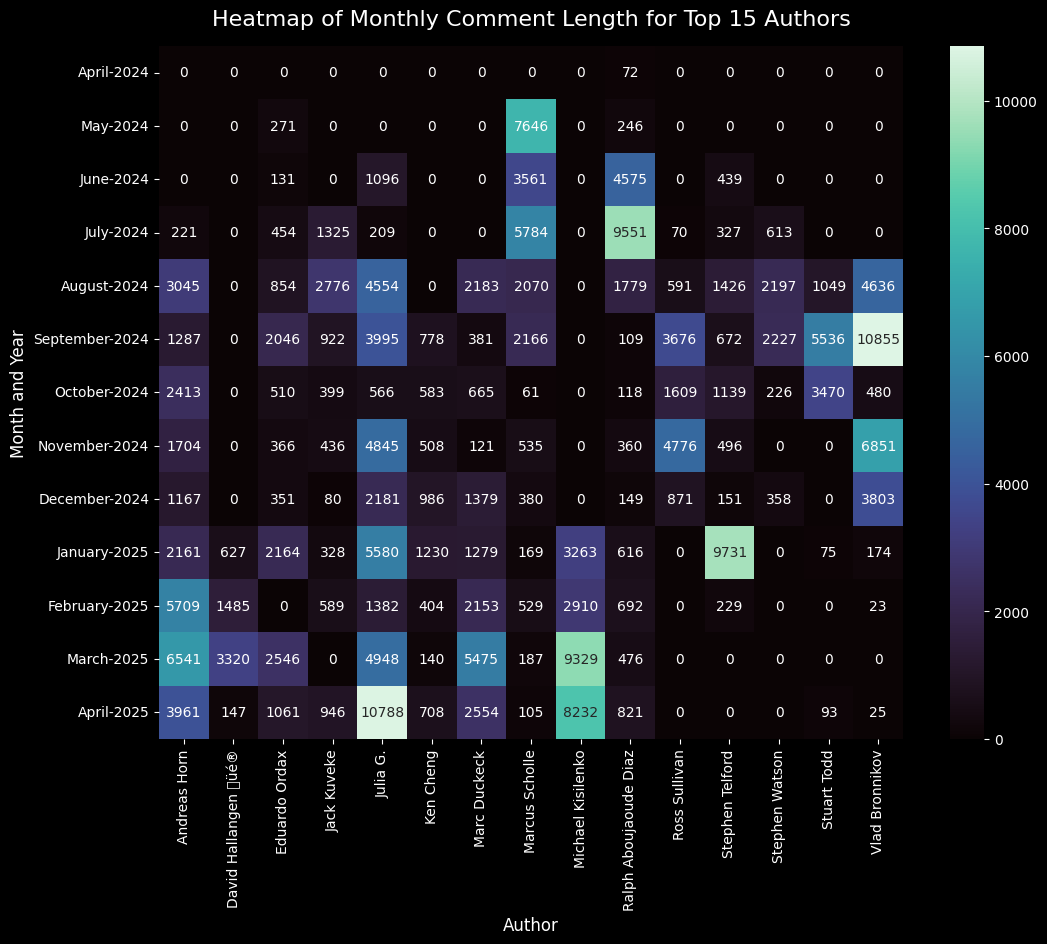

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

if not isinstance(pivot_table.index, pd.Index):
    pivot_table.index = pd.Index(pivot_table.index)

plt.figure(figsize=(12, 9))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="mako", yticklabels=pivot_table.index.strftime('%B-%Y'))
plt.title(f'Heatmap of Monthly Comment Length for Top {pivot_table.shape[1]} Authors', fontsize=16, pad=15)  # Threshold: comments > {top_15_authors.values[-1]-1}', fontsize=16,  pad=15)
plt.xlabel('Author', fontsize=12)
plt.ylabel('Month and Year', fontsize=12) # Changed the label

plt.style.use('dark_background')

plt.xticks(rotation=90)#, ha='right') # Rotated x-axis labels for better readability

#plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1) # Adjust these values as needed

#plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 63743 (\uf8ff) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 63743 (\uf8ff) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


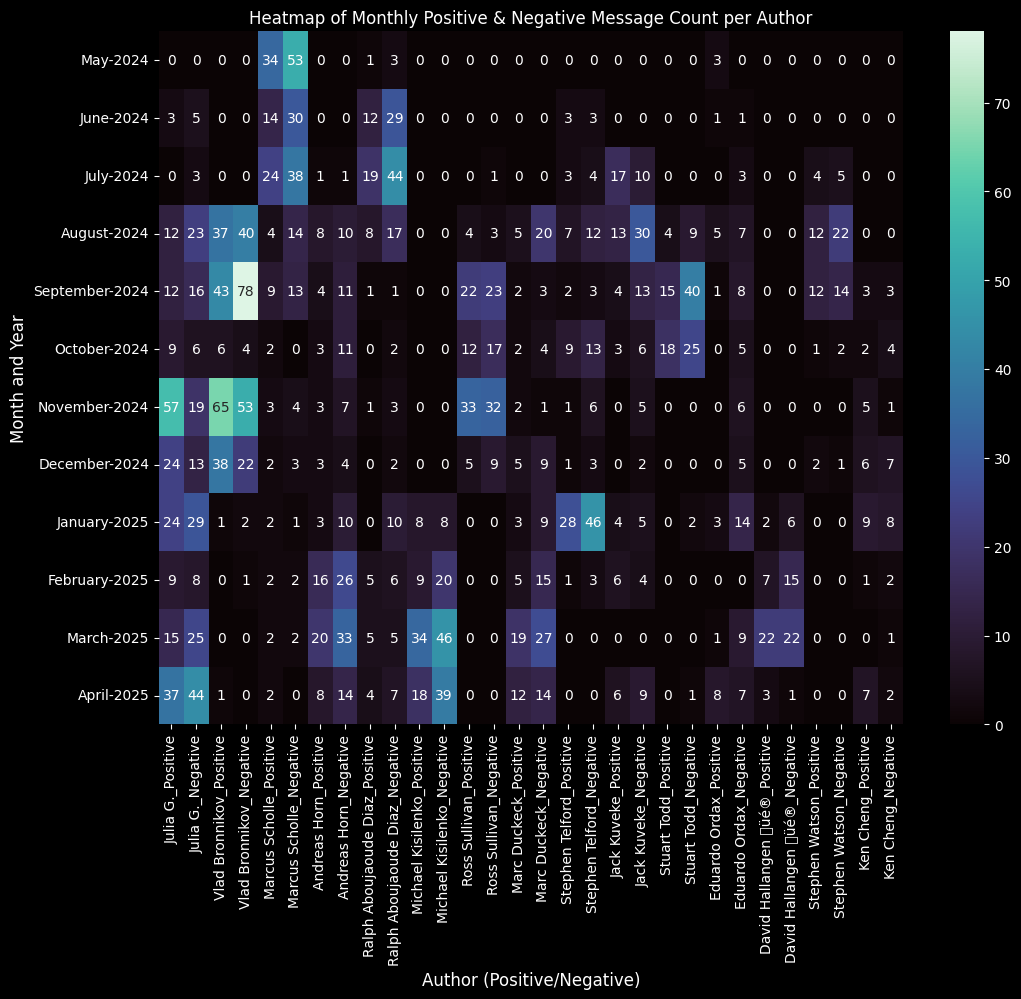

In [ ]:
# Create a new pivot table for positive and negative messages
positive_pivot = df[
    (df["Author"].isin(top_15_authors.index)) & (df["Sentiment_Label_message"] == "POSITIVE")
].pivot_table(
    index=pd.Grouper(key="Date", freq="ME"),
    columns="Author",
    values="Message",
    aggfunc="count",
    fill_value=0,
)

negative_pivot = df[
    (df["Author"].isin(top_15_authors.index)) & (df["Sentiment_Label_message"] == "NEGATIVE")
].pivot_table(
    index=pd.Grouper(key="Date", freq="ME"),
    columns="Author",
    values="Message",
    aggfunc="count",
    fill_value=0,
)


# Combine positive and negative counts into a single DataFrame
sentiment_pivot = pd.DataFrame(index=positive_pivot.index)

for author in top_15_authors.index:
    if author in positive_pivot.columns:
        sentiment_pivot[author + "_Positive"] = positive_pivot[author]
    else:
        sentiment_pivot[author + "_Positive"] = 0

    if author in negative_pivot.columns:
        sentiment_pivot[author + "_Negative"] = negative_pivot[author]
    else:
        sentiment_pivot[author + "_Negative"] = 0

#Convert index to DateTimeIndex
sentiment_pivot.index = pd.to_datetime(sentiment_pivot.index)

#Plot the heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(sentiment_pivot, annot=True, fmt="d", cmap="mako", yticklabels=sentiment_pivot.index.strftime('%B-%Y'))
plt.title(f"Heatmap of Monthly Positive & Negative Message Count per Author")
plt.xlabel("Author (Positive/Negative)", fontsize=12)
plt.ylabel("Month and Year", fontsize=12)
plt.xticks(rotation=90)
plt.show()


## COMMENTS AND POSTS SENTIMENT TABLE

In [ ]:
df_unique_links = df.drop_duplicates(subset='Link', keep='first') #only to show unique posts to calculate their negativity percentage

sentiment_counts = df.groupby(['Author']).agg({'Sentiment_Label_message': lambda x: x.value_counts().to_dict()})

# Sort by total sentiment counts in descending order
sentiment_counts['Number_of_Comments'] = sentiment_counts['Sentiment_Label_message'].apply(lambda x: sum(x.values()))
sentiment_counts['Total_Length'] = df.groupby('Author')['Length'].sum()
sentiment_counts['Average_Length'] = round(sentiment_counts['Total_Length']/sentiment_counts['Number_of_Comments'],1)

sentiment_counts['Negative_Posts'] = df_unique_links[df_unique_links['Sentiment_Label_post']=='NEGATIVE'].groupby('Author')['Sentiment_Label_post'].count()
sentiment_counts['Negative_Posts'] = pd.to_numeric(sentiment_counts['Negative_Posts'], errors='coerce').fillna(0).astype(int)

sentiment_counts['Positive_Posts'] = df_unique_links[df_unique_links['Sentiment_Label_post']=='POSITIVE'].groupby('Author')['Sentiment_Label_post'].count()
sentiment_counts['Positive_Posts'] = pd.to_numeric(sentiment_counts['Positive_Posts'], errors='coerce').fillna(0).astype(int)

def calculate_negative_ratio(sentiment_dict):
    return round(sentiment_dict.get('NEGATIVE', 0) / sum(sentiment_dict.values()) if sum(sentiment_dict.values()) > 0 else 0, 2)

sentiment_counts['Negative_Ratio_Comment'] = sentiment_counts['Sentiment_Label_message'].apply(calculate_negative_ratio)
sentiment_counts['Negative_Ratio_Post'] = round(sentiment_counts['Negative_Posts']/(sentiment_counts['Negative_Posts']+sentiment_counts['Positive_Posts']),2)

sentiment_counts = sentiment_counts.sort_values('Number_of_Comments', ascending=False)
# Display the result

sentiment_counts.head(15)


,Sentiment_Label_message,Number_of_Comments,Total_Length,Average_Length,Negative_Posts,Positive_Posts,Negative_Ratio_Comment,Negative_Ratio_Post
Author,,,,,,,,
Julia G.,"{'POSITIVE': 202, 'NEGATIVE': 191}",393,40144,102.1,67,27,0.49,0.71
Vlad Bronnikov,"{'NEGATIVE': 200, 'POSITIVE': 191}",391,26847,68.7,54,26,0.51,0.68
Marcus Scholle,"{'NEGATIVE': 160, 'POSITIVE': 101}",261,23193,88.9,125,14,0.61,0.90
Andreas Horn,"{'NEGATIVE': 127, 'POSITIVE': 69}",196,28209,143.9,54,39,0.65,0.58
Ralph Aboujaoude Diaz,"{'NEGATIVE': 130, 'POSITIVE': 57}",187,19564,104.6,85,24,0.70,0.78
Michael Kisilenko,"{'NEGATIVE': 113, 'POSITIVE': 69}",182,23734,130.4,60,16,0.62,0.79
Ross Sullivan,"{'NEGATIVE': 85, 'POSITIVE': 76}",161,11593,72.0,54,32,0.53,0.63
Marc Duckeck,"{'NEGATIVE': 102, 'POSITIVE': 55}",157,16190,103.1,30,39,0.65,0.43
Stephen Telford,"{'NEGATIVE': 93, 'POSITIVE': 55}",148,14610,98.7,64,31,0.63,0.67


## DAILY POSITIVE/NEGATIVE COMMENTS COUNT

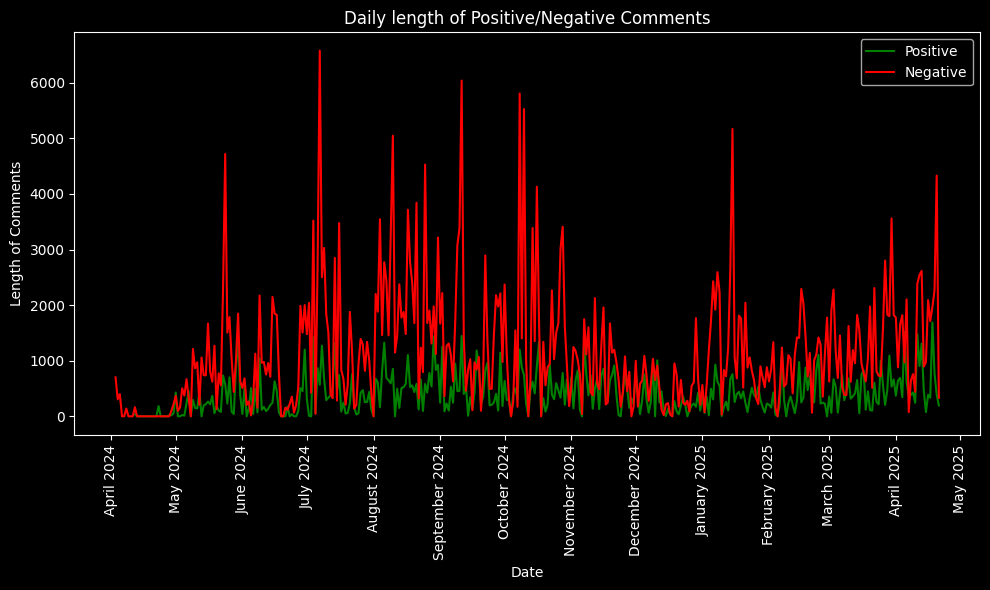

In [ ]:
daily_positive_message_count = df[df['Sentiment_Label_message']=='POSITIVE'].groupby(pd.Grouper(key='Date', freq='d'))['Length'].sum()
daily_negative_message_count = df[df['Sentiment_Label_message']=='NEGATIVE'].groupby(pd.Grouper(key='Date', freq='d'))['Length'].sum()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(daily_positive_message_count.index, daily_positive_message_count.values, label='Positive', color='green')  # Negate the y-values
plt.plot(daily_negative_message_count.index, daily_negative_message_count.values, label='Negative', color='red')  # Negate the y-values
#plt.plot(daily_message_count.index, daily_message_count.values, color='blue')


plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B %Y'))
plt.style.use('dark_background')

plt.xticks(rotation=90)

plt.xlabel('Date')
plt.ylabel('Length of Comments') # Change y-axis label
plt.title('Daily length of Positive/Negative Comments') # Change title
plt.legend()
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


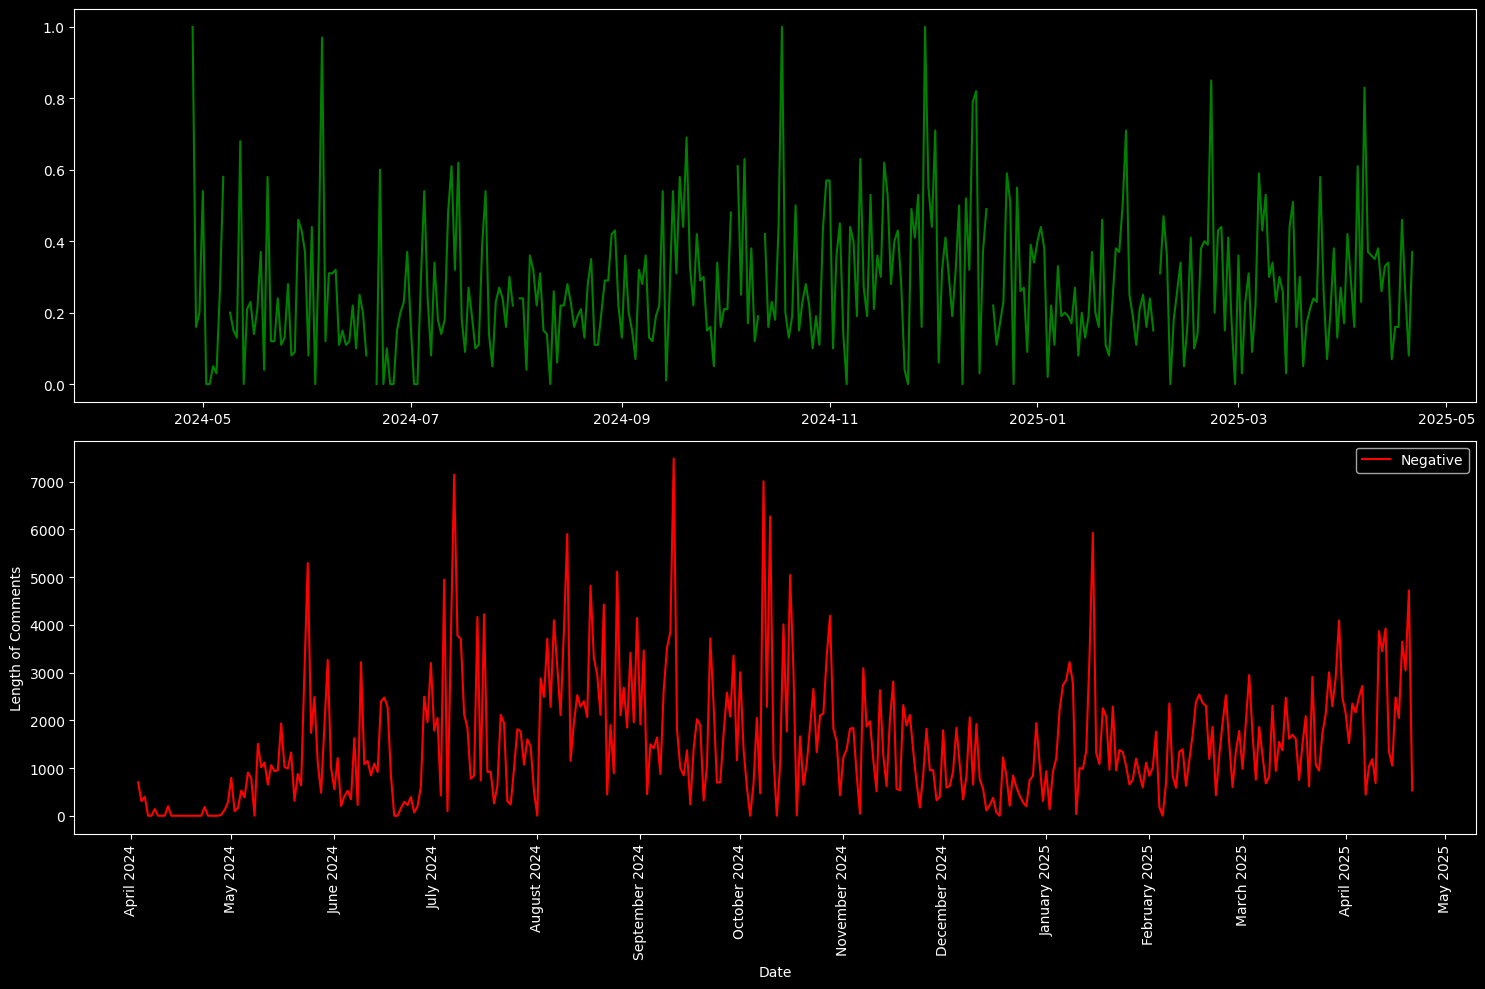

In [ ]:
daily_positive_message_length = df[df['Sentiment_Label_message']=='POSITIVE'].groupby(pd.Grouper(key='Date', freq='d'))['Length'].sum()
daily_negative_message_length = df[df['Sentiment_Label_message']=='NEGATIVE'].groupby(pd.Grouper(key='Date', freq='d'))['Length'].sum()

daily_positivity=daily_positive_message_length.div(daily_positive_message_length + daily_negative_message_length, fill_value=0).round(2)

daily_length=df.groupby(pd.Grouper(key='Date', freq='d'))['Length'].sum()

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(15, 10)) # 2 rows one column

axes[0].plot(daily_positivity.index, daily_positivity.values, label='Positive', color='green')
axes[1].plot(daily_length.index, daily_length.values, label='Negative', color='red')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B %Y'))
plt.style.use('dark_background')

plt.xticks(rotation=90)

plt.xlabel('Date')
plt.ylabel('Length of Comments') # Change y-axis label
#plt.title('Daily length of Positive/Negative Comments') # Change title
plt.legend()
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Sentiment scores grouped

In [ ]:
# Create bins for Sentiment_Score_message
bins = [0, 0.6, 0.8, 1.0]
labels_neg = ['Weak sentiment', 'Moderate sentiment', 'Strong sentiment']
labels_pos = ['Weak sentiment', 'Moderate sentiment', 'Strong sentiment']
df['Sentiment_Score_Interval'] = pd.cut(df['Sentiment_Score_message'], bins=bins, labels=labels_neg, right=False)

# Calculate sum of 'Length' for negative sentiment and different score intervals
result_neg = df[df['Sentiment_Label_message'] == 'NEGATIVE'].groupby('Sentiment_Score_Interval').agg({'Length': 'sum', 'Message': 'count'}

                                                                                                     ).rename(columns={'Length': 'Total_Length', 'Message': 'Message_Count'})
result_pos = df[df['Sentiment_Label_message'] == 'POSITIVE'].groupby('Sentiment_Score_Interval').agg({'Length': 'sum', 'Message': 'count'}
                                                                                                 ).rename(columns={'Length': 'Total_Length', 'Message': 'Message_Count'})


merged_sentiment = pd.merge(result_neg, result_pos, on='Sentiment_Score_Interval', suffixes=('_negative', '_positive'))
merged_sentiment


<ipython-input-71-195739d0ec51>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result_neg = df[df['Sentiment_Label_message'] == 'NEGATIVE'].groupby('Sentiment_Score_Interval').agg({'Length': 'sum', 'Message': 'count'}
<ipython-input-71-195739d0ec51>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result_pos = df[df['Sentiment_Label_message'] == 'POSITIVE'].groupby('Sentiment_Score_Interval').agg({'Length': 'sum', 'Message': 'count'}


,Total_Length_negative,Message_Count_negative,Total_Length_positive,Message_Count_positive
Sentiment_Score_Interval,,,,
Weak sentiment,8245,79,5769,75
Moderate sentiment,22776,209,13317,280
Strong sentiment,413644,3403,129657,1825


## Sentiment heatmaps

In [ ]:
# problem with the first week that should be 52th actually
pivot_table_neg = df[
    (df["Author"].isin(top_15_authors.index)) & (df["Sentiment_Label_message"] == "NEGATIVE") & (df['Date'].dt.year==2024)
].pivot_table(index=df['Date'].dt.weekday,
                                     columns=df['Date'].dt.isocalendar().week,
                                     values='Message',
                                     aggfunc='count',
                                     fill_value=0)
pivot_table_neg


week,1,18,19,20,21,22,23,24,25,26,...,43,44,45,46,47,48,49,50,51,52
Date,,,,,,,,,,,,,,,,,,,,,
0,6,1,4,1,2,4,2,4,3,3,...,1,3,3,5,2,4,3,3,1,1
1,2,0,2,2,5,0,3,2,1,2,...,3,6,2,10,7,6,4,0,0,0
2,0,1,0,1,2,0,1,1,0,2,...,2,4,1,2,8,6,4,5,0,3
3,0,0,2,1,2,1,2,3,0,1,...,2,1,6,5,3,6,6,1,3,0
4,0,0,4,0,3,1,0,3,0,5,...,6,2,12,9,5,0,3,2,4,0
5,0,1,0,2,3,1,2,5,0,4,...,6,1,9,5,6,0,2,1,2,2
6,0,3,1,3,5,0,9,4,1,4,...,3,6,5,1,0,10,4,1,0,7


In [ ]:
pivot_table_pos = df[
    (df["Author"].isin(top_15_authors.index)) & (df["Sentiment_Label_message"] == "POSITIVE") & (df['Date'].dt.year==2024)
].pivot_table(index=df['Date'].dt.weekday,
                                     columns=df['Date'].dt.isocalendar().week,
                                     values='Message',
                                     aggfunc='count',
                                     fill_value=0)

In [ ]:
pivot_table_positivity = pivot_table_pos / (pivot_table_pos + pivot_table_neg)

pivot_table_positivity = pivot_table_positivity.fillna(0)

pivot_table_positivity

week,1,18,19,20,21,22,23,24,25,26,...,43,44,45,46,47,48,49,50,51,52
Date,,,,,,,,,,,,,,,,,,,,,
0,0.333333,0.00,0.428571,0.000000,0.333333,0.000000,0.000000,0.200,0.4,0.250000,...,0.000000,0.25,0.500000,0.444444,0.666667,0.733333,0.571429,0.625000,0.666667,0.666667
1,0.500000,0.00,0.666667,0.333333,0.166667,0.000000,0.250000,0.000,0.0,0.000000,...,0.000000,0.25,0.000000,0.375000,0.588235,0.666667,0.333333,0.000000,0.000000,1.000000
2,0.000000,0.75,0.000000,0.750000,0.333333,0.000000,0.500000,0.000,0.0,0.000000,...,0.000000,0.20,0.000000,0.800000,0.600000,0.333333,0.636364,0.375000,0.000000,0.000000
3,0.000000,0.00,0.600000,0.666667,0.333333,0.666667,0.000000,0.250,0.0,0.500000,...,0.500000,0.50,0.684211,0.500000,0.700000,0.333333,0.333333,0.500000,0.571429,0.000000
4,0.000000,0.00,0.000000,1.000000,0.000000,0.666667,0.000000,0.250,0.0,0.444444,...,0.250000,0.00,0.368421,0.357143,0.642857,1.000000,0.750000,0.500000,0.333333,1.000000
5,0.000000,0.00,0.000000,0.600000,0.250000,0.000000,0.333333,0.375,1.0,0.555556,...,0.142857,0.00,0.437500,0.545455,0.250000,0.000000,0.500000,0.000000,0.333333,0.000000
6,0.000000,0.00,0.800000,0.000000,0.166667,1.000000,0.307692,0.200,0.0,0.200000,...,0.571429,0.50,0.687500,0.888889,1.000000,0.677419,0.333333,0.666667,1.000000,0.000000


<Axes: xlabel='week', ylabel='Date'>

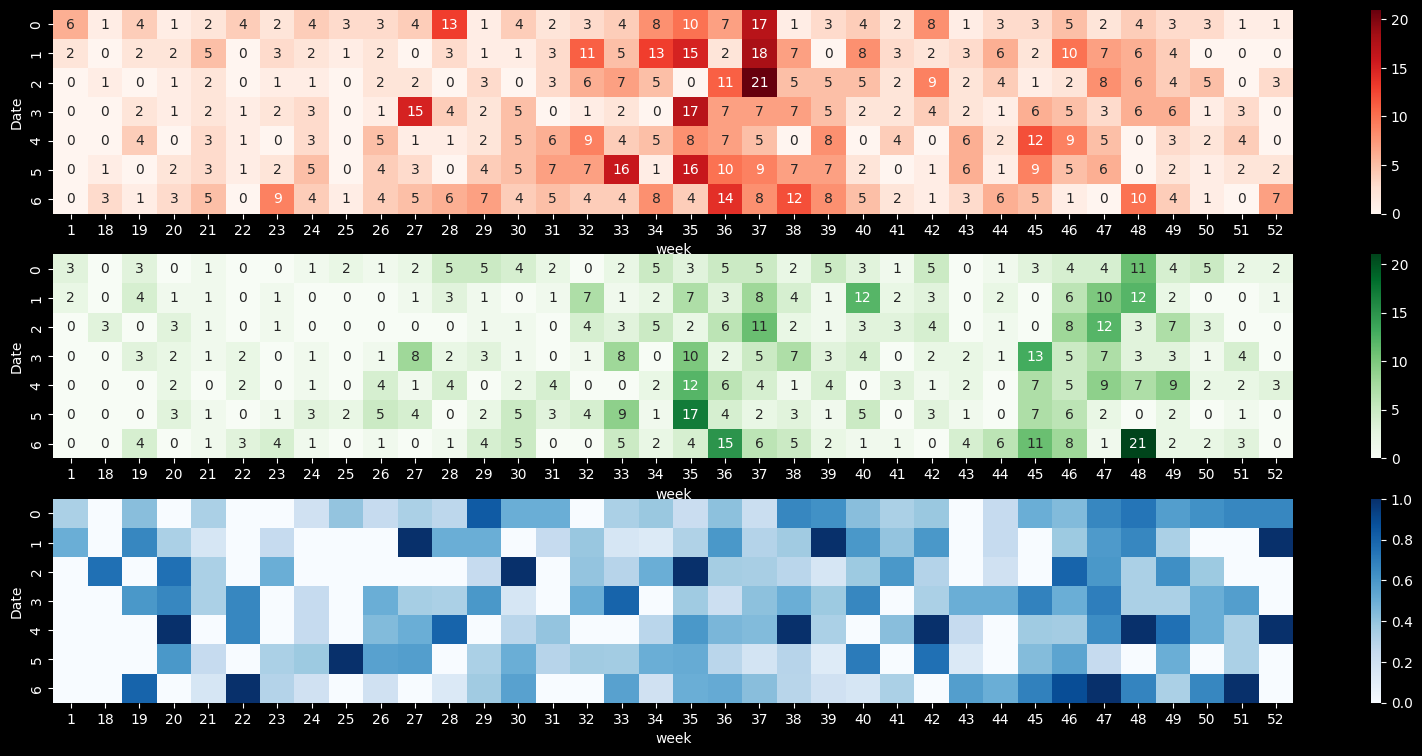

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'pivot_table' is your DataFrame with dayofweek as index and month names as columns.
fig, axes = plt.subplots(3, 1, figsize=(20, 9))  # 2 rows, 3 columns
#axes = axes.flatten()

#plt.figure(figsize=(20, 2))

sns.heatmap(pivot_table_neg, annot=True, fmt="d", cmap="Reds", ax=axes[0])
sns.heatmap(pivot_table_pos, annot=True, fmt="d", cmap='Greens', ax=axes[1])
sns.heatmap(pivot_table_positivity,  cmap="Blues", ax=axes[2])

#plt.title('Heatmap of Negative Comments in 2024')
#plt.xlabel('Weeks')
#plt.ylabel('Day of Week')
#plt.xticks(rotation=45)
#plt.show()


In [ ]:
df_top_15=df[df['Author'].isin(top_15_authors.index)]

In [ ]:
# Example of some short ironic/sarcastic comments that were interpreted as positive by sentiment analysis. Context matters.

df_top_15[(df_top_15['Sentiment_Label_message']=='POSITIVE')&
          (df_top_15['Sentiment_Label_post']=='NEGATIVE')&
          (df_top_15['Sentiment_Score_message']>=0.999)&
          (df_top_15['Sentiment_Score_post']>=0.999)&
          (df_top_15['Length']<=50)].sort_values(by='Sentiment_Score_message', ascending=False)

,Unnamed: 0.1,Unnamed: 0,Date,Link,Message,Length,emoji_number,Message_no_link,Author,Post,Cleaned_Message,Cleaned_Post,Sentiment_Label_message,Sentiment_Score_message,Sentiment_Label_post,Sentiment_Score_post,Quartal,Quarter
3266,3266,3266,2024-09-26 06:09:10,https://www.linkedin.com/feed/update/urn%3Ali%...,'Good vibe' for the rest of the day. Thanks. 😂,40,1,'Good vibe' for the rest of the day. Thanks. 😂,Marc Duckeck,🎶 I'm starting with the man in the mirror\nI'm...,good vibe for the rest of the day thanks,im starting with the man in the mirror im aski...,POSITIVE,0.999850,NEGATIVE,0.999058,2024Q3,2024Q3
2829,2829,2829,2024-10-19 09:51:29,https://www.linkedin.com/feed/update/urn%3Ali%...,Proud to be half Lithuanian. :D,29,0,Proud to be half Lithuanian. :D,Stephen Telford,"Evaldas Rimasauskas, a man from Lithuania, sca...",proud to be half lithuanian d,evaldas rimasauskas a man from lithuania scamm...,POSITIVE,0.999842,NEGATIVE,0.999336,2024Q4,2024Q4
94,94,94,2025-04-18 13:00:56,https://www.linkedin.com/feed/update/urn%3Ali%...,Good robot!,10,0,Good robot!,Michael Kisilenko,The vibe of hype-driven development is killing...,good robot,the vibe of hypedriven development is killing ...,POSITIVE,0.999842,NEGATIVE,0.999374,2025Q2,2025Q2
3108,3108,3108,2024-10-05 16:22:51,https://www.linkedin.com/feed/update/urn%3Ali%...,Well done. 👍,9,1,Well done. 👍,Jack Kuveke,Here's how to succeed in your 20s: \n\nStep 1:...,well done,heres how to succeed in your 20s step 1 steal ...,POSITIVE,0.999838,NEGATIVE,0.999134,2024Q4,2024Q4
783,783,783,2025-03-10 21:02:50,https://www.linkedin.com/feed/update/urn%3Ali%...,"Let's just agree, it's all magic. ✨",29,1,"Let's just agree, it's all magic. ✨",Michael Kisilenko,"Traditional developer: ""I need 4 hours researc...",lets just agree its all magic,traditional developer i need 4 hours researchi...,POSITIVE,0.999824,NEGATIVE,0.999342,2025Q1,2025Q1
1460,1460,1460,2025-01-21 15:32:41,https://www.linkedin.com/feed/update/urn%3Ali%...,Just a regular nice guy.,23,0,Just a regular nice guy.,Stephen Telford,Weakest social engineering attempt ever...,just a regular nice guy,weakest social engineering attempt ever,POSITIVE,0.999707,NEGATIVE,0.999759,2025Q1,2025Q1
4534,4534,4534,2024-08-06 19:41:28,https://www.linkedin.com/feed/update/urn%3Ali%...,"Wes Lorenzini words of a wise person, indeed.",43,0,"Wes Lorenzini words of a wise person, indeed.",Jack Kuveke,This morning I was conducting a final round in...,wes lorenzini words of a wise person indeed,this morning i was conducting a final round in...,POSITIVE,0.999239,NEGATIVE,0.999311,2024Q3,2024Q3
692,692,692,2025-03-17 07:19:59,https://www.linkedin.com/feed/update/urn%3Ali%...,Marc Duckeck sure,17,0,Marc Duckeck sure,Marc Duckeck,üí∞ Make money while you sleep\n\nDid you kno...,marc duckeck sure,üí make money while you sleep did you know tha...,POSITIVE,0.999175,NEGATIVE,0.999658,2025Q1,2025Q1


## FIRST&LAST MESSAGES TO TOP 15 AUTHORS

In [ ]:
import pandas as pd

# Create an empty list to store the data for the table
table_data = []
table_data1= []

# Iterate through the top 15 authors
for author in top_15_authors.index:
    try:
        # Get the first and last messages and dates for the current author
        first_message = df[df['Author'] == author]['Message_no_link'].iloc[-1]
        last_message = df[df['Author'] == author]['Message_no_link'].iloc[0]
        first_date = df[df['Author'] == author]['Date'].iloc[-1]
        last_date = df[df['Author'] == author]['Date'].iloc[0]
        first_sentiment = df[df['Author'] == author]['Sentiment_Label_message'].iloc[-1]
        last_sentiment = df[df['Author'] == author]['Sentiment_Label_message'].iloc[0]

        # Append the data to the list
        table_data.append({'Author': author, 'First_comment': first_message, 'Date': first_date, 'Sentiment': first_sentiment})
        table_data1.append({'Author': author, 'Last_comment': last_message, 'Date': last_date, 'Sentiment': last_sentiment})
    except IndexError:
        print(f"No messages found for author: {author}")

# Create a DataFrame from the table data
table_df = pd.DataFrame(table_data)
table_df1 = pd.DataFrame(table_data1)

# Display the table
table_df



,Author,First_comment,Date,Sentiment
0,Julia G.,It's not my Viz. Just found it and shared here...,2024-06-14 19:54:46,NEGATIVE
1,Vlad Bronnikov,"Not just a selfie but with the food. So, all I...",2024-08-10 07:58:54,NEGATIVE
2,Marcus Scholle,This lioness has more IQ than humans. Idiocracy.,2024-05-01 05:59:18,POSITIVE
3,Andreas Horn,Wear VR glasses and you will never be disappoi...,2024-07-27 09:21:47,NEGATIVE
4,Ralph Aboujaoude Diaz,Just a programmer on the spectrum. :) sometime...,2024-04-29 07:31:50,NEGATIVE
5,Michael Kisilenko,"Aww, and Hannibal Lecter enjoying the raw meat...",2025-01-12 12:07:18,POSITIVE
6,Ross Sullivan,"Opinions change gradually with the age, almost...",2024-07-28 10:23:04,NEGATIVE
7,Marc Duckeck,"Yep, people behave differently in different si...",2024-08-16 07:51:08,NEGATIVE
8,Stephen Telford,The only solution: Stanley food jar and 🎒 that...,2024-06-28 14:07:51,POSITIVE
9,Jack Kuveke,"Hey, you will get old someday too, hopefully w...",2024-07-01 19:03:46,POSITIVE


In [ ]:
# Merge the two dataframes
merged_df = pd.merge(table_df, table_df1, on='Author', suffixes=('_first', '_last'))
merged_df


,Author,First_comment,Date_first,Sentiment_first,Last_comment,Date_last,Sentiment_last
0,Julia G.,It's not my Viz. Just found it and shared here...,2024-06-14 19:54:46,NEGATIVE,"No worries, you are not the first person here ...",2025-04-20 14:47:44,NEGATIVE
1,Vlad Bronnikov,"Not just a selfie but with the food. So, all I...",2024-08-10 07:58:54,NEGATIVE,'like any visionary dealer'..,2025-04-08 11:08:34,POSITIVE
2,Marcus Scholle,This lioness has more IQ than humans. Idiocracy.,2024-05-01 05:59:18,POSITIVE,He thinks? It's a bold statement.,2025-04-05 08:28:43,POSITIVE
3,Andreas Horn,Wear VR glasses and you will never be disappoi...,2024-07-27 09:21:47,NEGATIVE,Will it create valuable output or an illusion ...,2025-04-14 10:04:25,NEGATIVE
4,Ralph Aboujaoude Diaz,Just a programmer on the spectrum. :) sometime...,2024-04-29 07:31:50,NEGATIVE,Won't somebody please think of the sigma males.,2025-04-21 17:05:32,POSITIVE
5,Michael Kisilenko,"Aww, and Hannibal Lecter enjoying the raw meat...",2025-01-12 12:07:18,POSITIVE,Whose body? 🧐,2025-04-21 11:46:10,POSITIVE
6,Ross Sullivan,"Opinions change gradually with the age, almost...",2024-07-28 10:23:04,NEGATIVE,"Unfortunately I joined this place too late, th...",2024-12-15 12:36:32,NEGATIVE
7,Marc Duckeck,"Yep, people behave differently in different si...",2024-08-16 07:51:08,NEGATIVE,Does machine have 👀? \n\nEvery move you'll mak...,2025-04-21 07:05:18,NEGATIVE
8,Stephen Telford,The only solution: Stanley food jar and 🎒 that...,2024-06-28 14:07:51,POSITIVE,the same as 'dear'.,2025-02-03 12:19:38,POSITIVE
9,Jack Kuveke,"Hey, you will get old someday too, hopefully w...",2024-07-01 19:03:46,POSITIVE,Does not compute?,2025-04-18 21:32:50,NEGATIVE
